In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
dataSet = pd.read_csv("Assignment1.csv")

In [4]:
dataSet

#              From To (Interval: 15M)  \
0        1  01-02-2023 00:00   01-02-2023 00:15   
1        2  01-02-2023 00:15   01-02-2023 00:30   
2        3  01-02-2023 00:30   01-02-2023 00:45   
3        4  01-02-2023 00:45   01-02-2023 01:00   
4        5  01-02-2023 01:00   01-02-2023 01:15   
...    ...               ...                ...   
8635  8636  01-05-2023 22:45   01-05-2023 23:00   
8636  8637  01-05-2023 23:00   01-05-2023 23:15   
8637  8638  01-05-2023 23:15   01-05-2023 23:30   
8638  8639  01-05-2023 23:30   01-05-2023 23:45   
8639  8640  01-05-2023 23:45   02-05-2023 00:00   

      Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                                  95.0       
1                                                  95.0       
2                                                  95.0       
3                                                 122.0       
4                                                 122.0       
...                                                 ...       
8635                                               19.0       
8636                                               19.0       
8637                                               19.0       
8638                                               19.0       
8639                                               32.0       

      Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                                  35.0        
1                                                  35.0        
2                                                  35.0        
3                                                  34.0        
4                                                  34.0        
...                                                 ...        
8635                                               11.0        
8636                                               11.0        
8637                                               11.0        
8638                                               11.0        
8639                                                6.0        

      Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
8635                                               17.9     
8636                                               17.9     
8637                                               19.6     
8638                                               20.8     
8639                                               21.8     

      Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                                  90.1      
1                                                  88.0      
2                                                  87.7      
3                                                  88.9      
4                                                  90.0      
...                                                 ...      
8635                                              100.0      
8636                                              100.0      
8637                                              100.2      
8638                                              100.2      
8639                                               98.8      

      Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                                  56.2    
1                                                  55.1    
2                                                  55.2    
3                                                  55.7    
4                                                  55.8    
...                             

In [5]:
dataSet.describe()

#  Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
count  8640.000000                                        6959.000000       
mean   4320.500000                                         181.408679       
std    2494.297496                                         136.016142       
min       1.000000                                          12.000000       
25%    2160.750000                                          84.000000       
50%    4320.500000                                         145.000000       
75%    6480.250000                                         238.000000       
max    8640.000000                                         847.000000       

       Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
count                                        8414.000000        
mean                                           75.690397        
std                                            55.245265        
min                                             3.000000        
25%                                            36.000000        
50%                                            61.000000        
75%                                           101.000000        
max                                           474.000000        

       Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
count                                        7271.000000     
mean                                           14.649636     
std                                            19.221385     
min                                             0.100000     
25%                                             3.900000     
50%                                             6.100000     
75%                                            16.500000     
max                                           157.500000     

       Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
count                                        8224.000000      
mean                                           55.757028      
std                                            20.231407      
min                                             0.200000      
25%                                            39.400000      
50%                                            53.200000      
75%                                            71.025000      
max                                           106.900000      

       Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
count                                        8225.000000    
mean                                           42.672219    
std                                            22.435262    
min                                             4.200000    
25%                                            25.000000    
50%                                            37.700000    
75%                                            53.800000    
max                                           165.200000    

       Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
count                                        8144.000000     
mean                                            1.408538     
std                                             0.631056     
min                                             0.100000     
25%                                             0.950000     
50%                                             1.420000     
75%                                             1.850000     
max                                             4.000000     

       Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
count                                        7189.000000      
mean                                           34.232731      
std                                            39.452131      
min                                             0.100000      
25%                                            16.100000      
50%                                            25.300000      
75%                                            35.200000    

In [6]:
columns = dataSet.columns
date = columns[2]
columns = columns[3:]
columns

Index(['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')

In [7]:
for column in columns:
    print((dataSet[column].isna().sum() / len(dataSet[column])) * 100)

19.45601851851852
2.6157407407407405
15.844907407407408
4.814814814814815
4.8032407407407405
5.7407407407407405
16.79398148148148
3.7731481481481484
5.243055555555555
71.70138888888889


In [8]:
dataSet

#              From To (Interval: 15M)  \
0        1  01-02-2023 00:00   01-02-2023 00:15   
1        2  01-02-2023 00:15   01-02-2023 00:30   
2        3  01-02-2023 00:30   01-02-2023 00:45   
3        4  01-02-2023 00:45   01-02-2023 01:00   
4        5  01-02-2023 01:00   01-02-2023 01:15   
...    ...               ...                ...   
8635  8636  01-05-2023 22:45   01-05-2023 23:00   
8636  8637  01-05-2023 23:00   01-05-2023 23:15   
8637  8638  01-05-2023 23:15   01-05-2023 23:30   
8638  8639  01-05-2023 23:30   01-05-2023 23:45   
8639  8640  01-05-2023 23:45   02-05-2023 00:00   

      Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                                  95.0       
1                                                  95.0       
2                                                  95.0       
3                                                 122.0       
4                                                 122.0       
...                                                 ...       
8635                                               19.0       
8636                                               19.0       
8637                                               19.0       
8638                                               19.0       
8639                                               32.0       

      Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                                  35.0        
1                                                  35.0        
2                                                  35.0        
3                                                  34.0        
4                                                  34.0        
...                                                 ...        
8635                                               11.0        
8636                                               11.0        
8637                                               11.0        
8638                                               11.0        
8639                                                6.0        

      Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
8635                                               17.9     
8636                                               17.9     
8637                                               19.6     
8638                                               20.8     
8639                                               21.8     

      Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                                  90.1      
1                                                  88.0      
2                                                  87.7      
3                                                  88.9      
4                                                  90.0      
...                                                 ...      
8635                                              100.0      
8636                                              100.0      
8637                                              100.2      
8638                                              100.2      
8639                                               98.8      

      Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                                  56.2    
1                                                  55.1    
2                                                  55.2    
3                                                  55.7    
4                                                  55.8    
...                             

In [9]:
for column in columns:
    new_df = pd.Series(dataSet[column])
    dataSet[column] = new_df.interpolate(limit_direction = "both", kind = "linear")

In [10]:
dataSet.describe()

#  Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
count  8640.000000                                        8640.000000       
mean   4320.500000                                         177.463079       
std    2494.297496                                         124.773568       
min       1.000000                                          12.000000       
25%    2160.750000                                          97.000000       
50%    4320.500000                                         151.900794       
75%    6480.250000                                         215.000000       
max    8640.000000                                         847.000000       

       Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
count                                        8640.000000        
mean                                           75.557350        
std                                            54.826850        
min                                             3.000000        
25%                                            36.821429        
50%                                            61.000000        
75%                                           101.000000        
max                                           474.000000        

       Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
count                                        8640.000000     
mean                                           14.940208     
std                                            17.862679     
min                                             0.100000     
25%                                             4.000000     
50%                                             7.500000     
75%                                            18.100000     
max                                           157.500000     

       Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
count                                        8640.000000      
mean                                           55.430689      
std                                            20.205531      
min                                             0.200000      
25%                                            39.300000      
50%                                            52.800000      
75%                                            70.700000      
max                                           106.900000      

       Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
count                                        8640.000000    
mean                                           42.328802    
std                                            22.181225    
min                                             4.200000    
25%                                            24.900000    
50%                                            37.500000    
75%                                            53.200000    
max                                           165.200000    

       Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
count                                        8640.000000     
mean                                            1.401927     
std                                             0.633087     
min                                             0.100000     
25%                                             0.950000     
50%                                             1.410000     
75%                                             1.850000     
max                                             4.000000     

       Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
count                                        8640.000000      
mean                                           31.923270      
std                                            39.028371      
min                                             0.100000      
25%                                            12.300000      
50%                                            22.800000      
75%                                            33.400000    

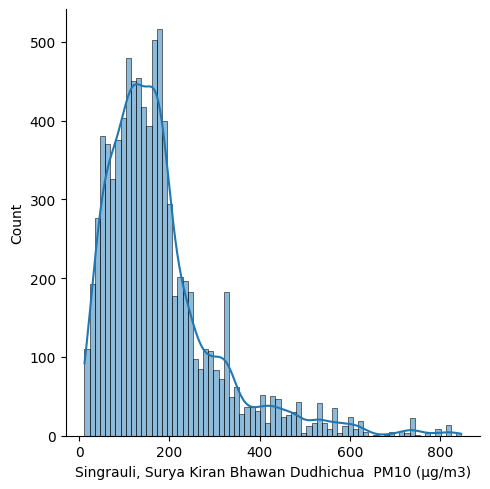

Mean = 177.463079
Median = 151.900794
Mode = 53.000000


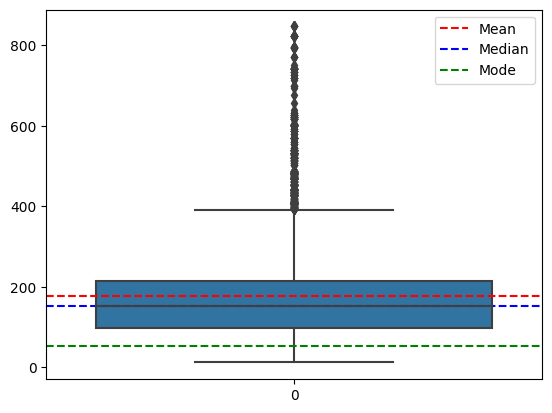

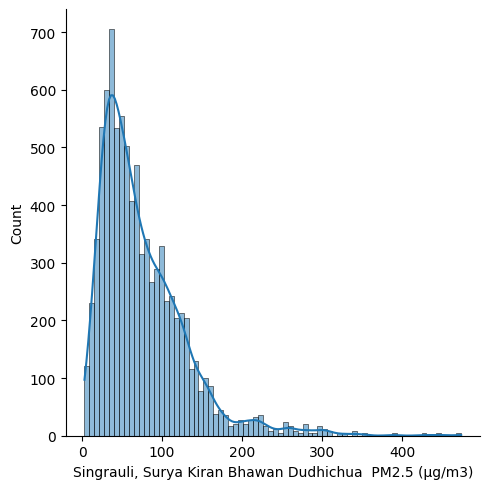

Mean = 75.557350
Median = 61.000000
Mode = 27.000000


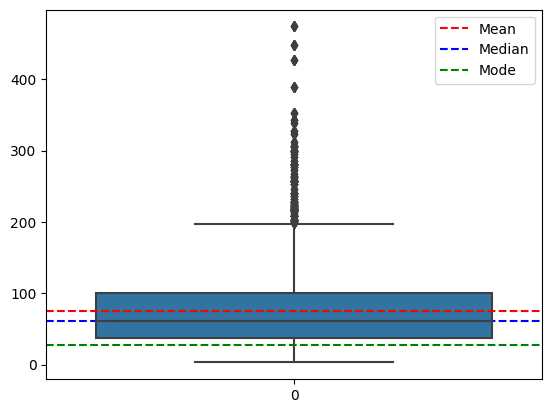

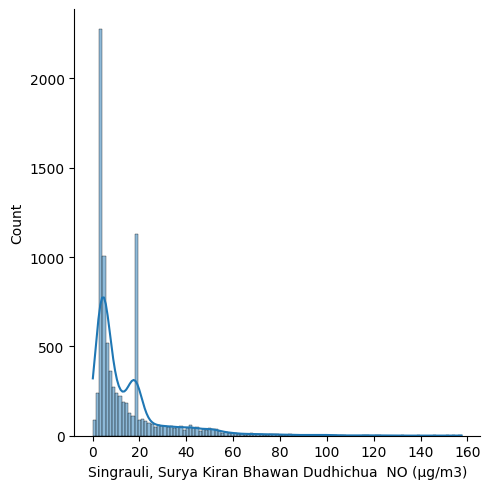

Mean = 14.940208
Median = 7.500000
Mode = 18.100000


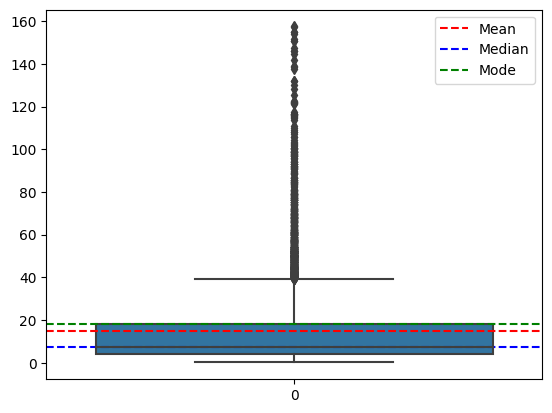

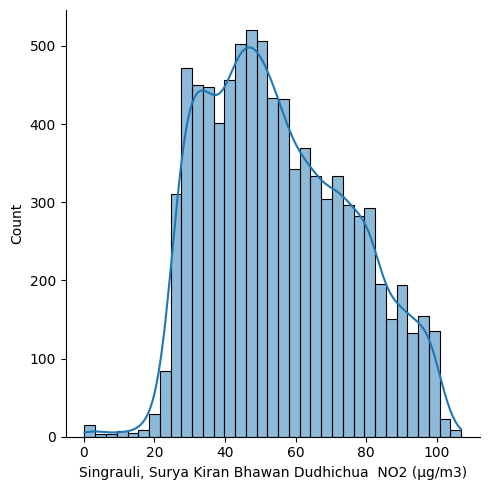

Mean = 55.430689
Median = 52.800000
Mode = 55.300000


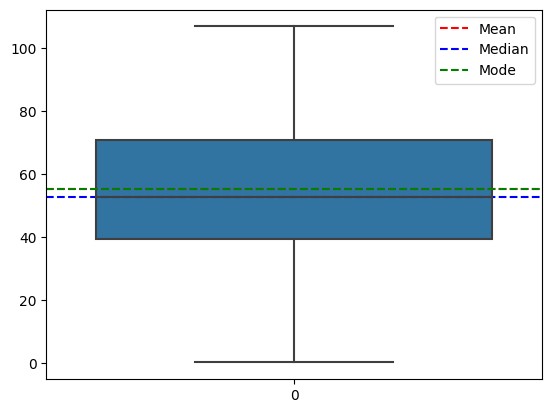

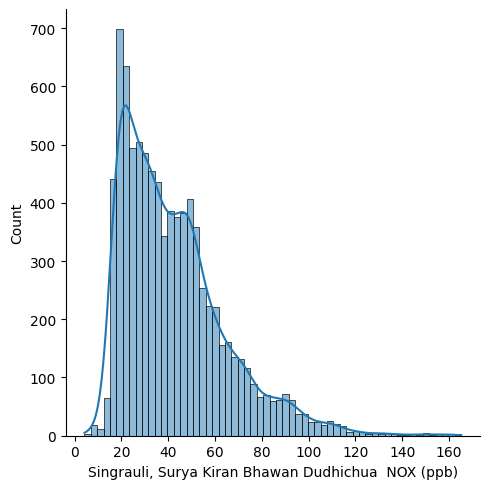

Mean = 42.328802
Median = 37.500000
Mode = 18.100000


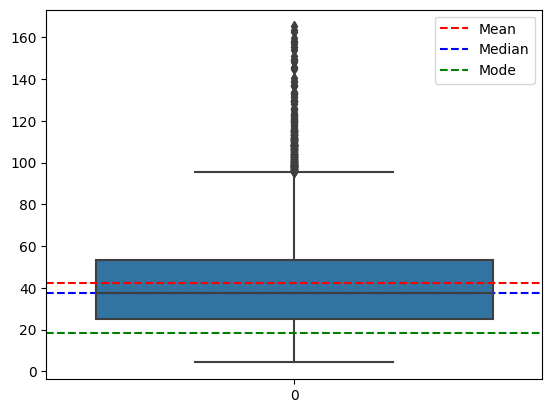

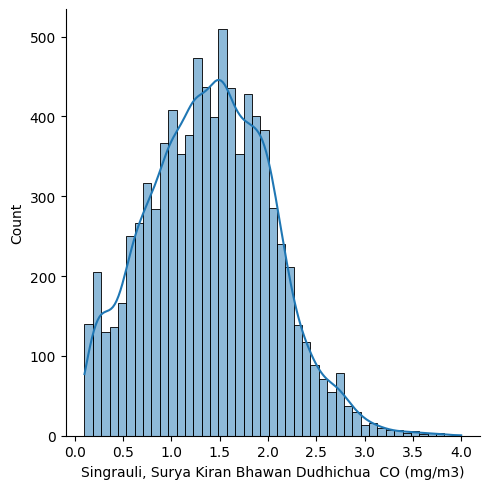

Mean = 1.401927
Median = 1.410000
Mode = 1.510000


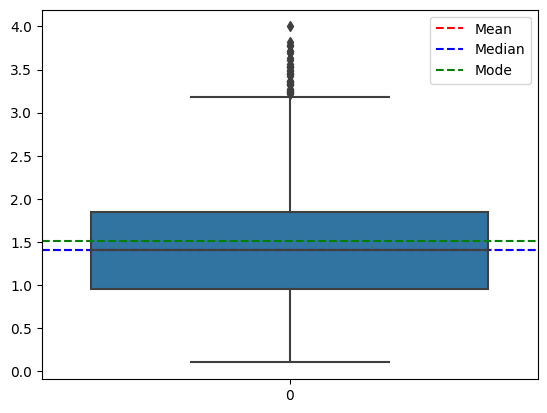

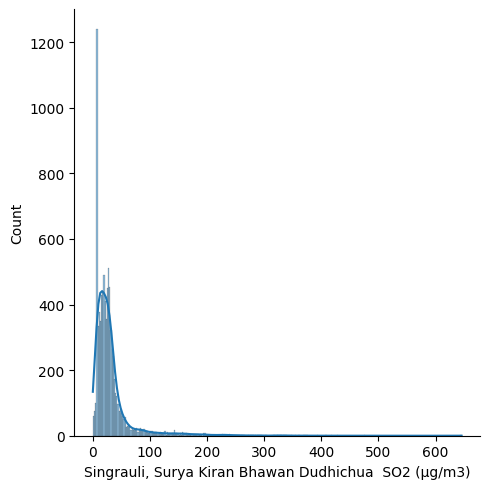

Mean = 31.923270
Median = 22.800000
Mode = 8.200000


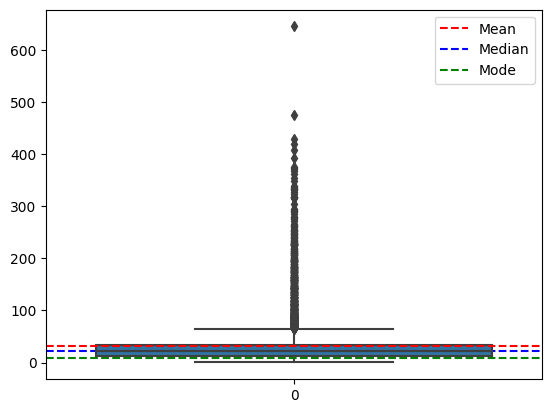

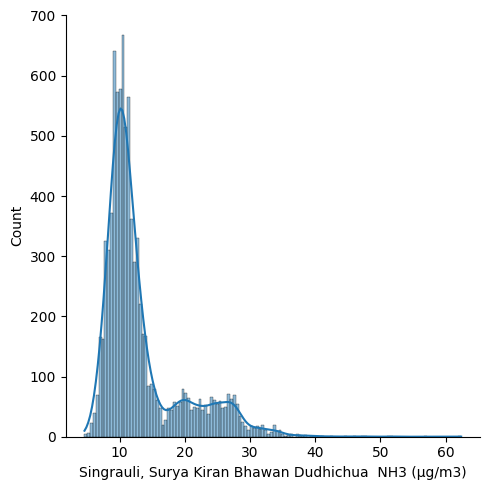

Mean = 13.286956
Median = 11.000000
Mode = 9.800000


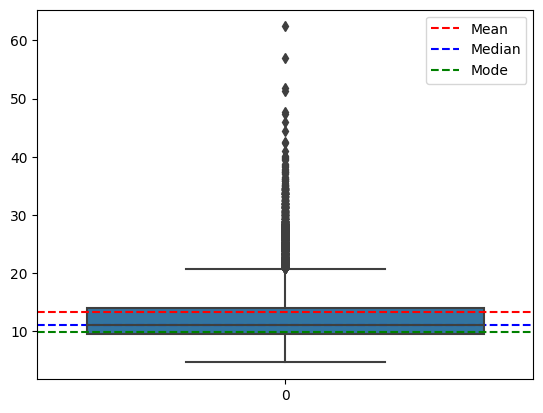

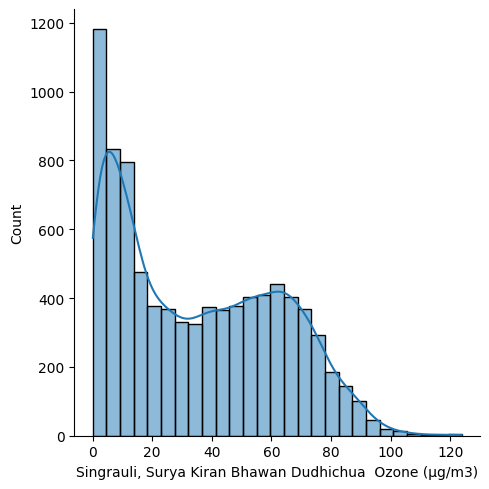

Mean = 35.193970
Median = 31.700000
Mode = 1.700000


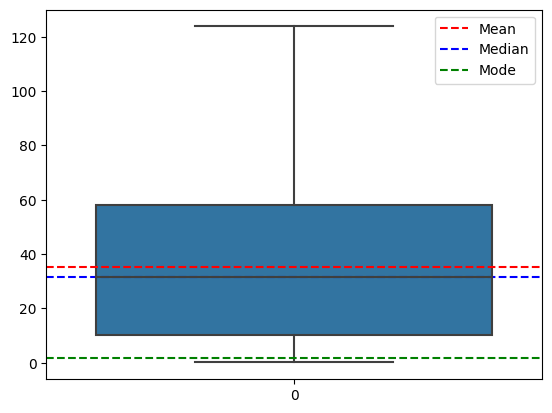

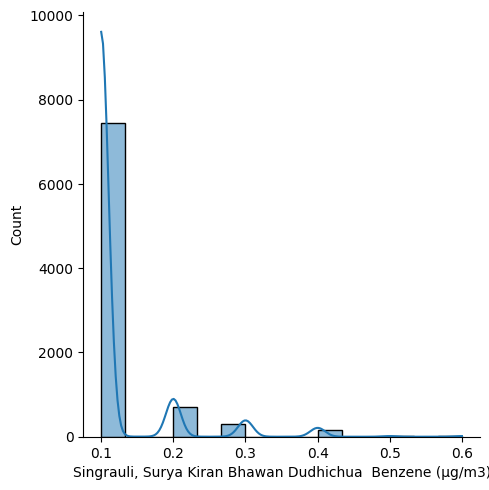

Mean = 0.122002
Median = 0.100000
Mode = 0.100000


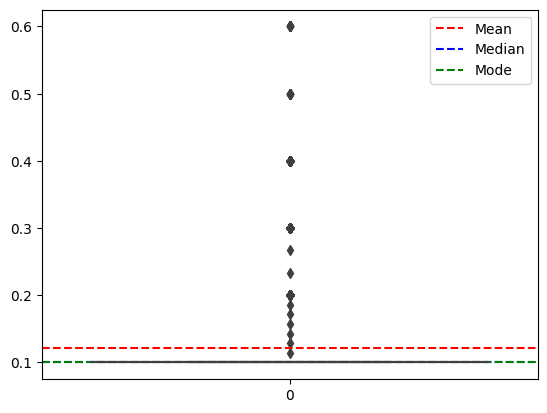

In [11]:
import statistics
for column in columns:
    sns.displot(dataSet[column], kde = True)
    plt.show()
    mean = np.mean(dataSet[column])
    median = np.median(dataSet[column])
    mode = float(statistics.mode(dataSet[column]))
    print("Mean = %f" %mean)
    print("Median = %f" %median)
    print("Mode = %f" %mode)
    # Create a boxplot with mean, median, and mode annotations
    sns.boxplot(data=dataSet[column])
    plt.axhline(mean, color='red', linestyle='--', label='Mean')
    plt.axhline(median, color='blue', linestyle='--', label='Median')
    plt.axhline(mode, color='green', linestyle='--', label='Mode')
    plt.legend()
    plt.show()

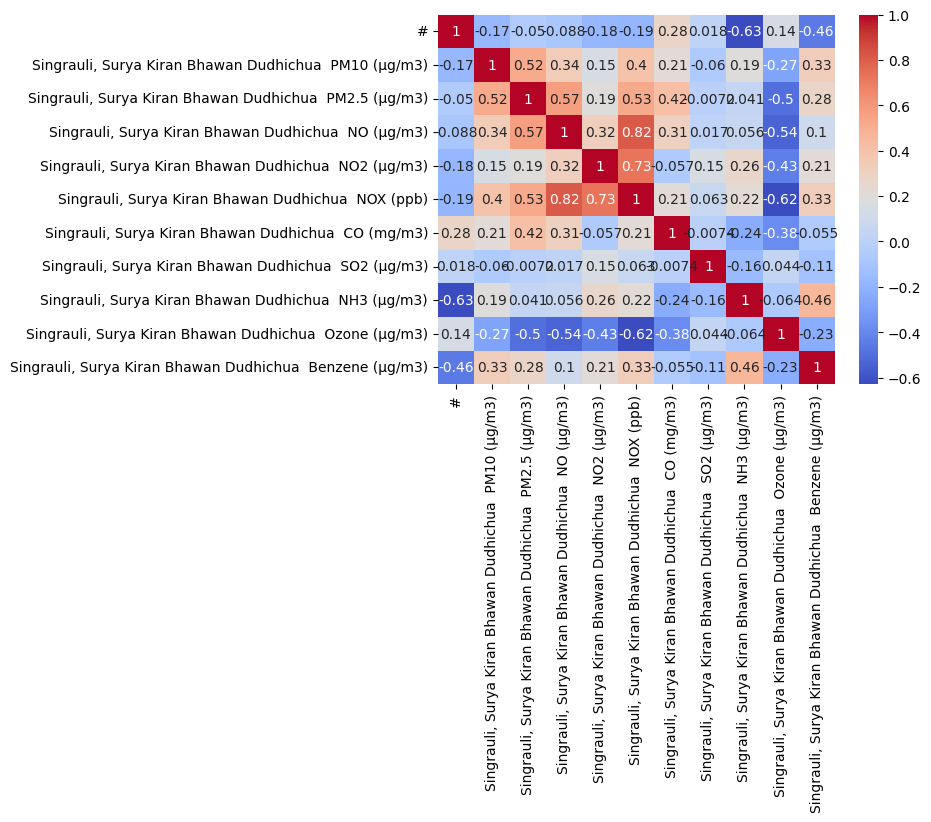

In [12]:
corr = dataSet.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [13]:
import statsmodels.api as sm

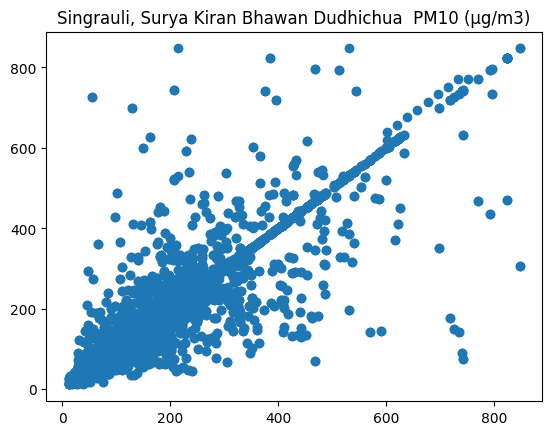

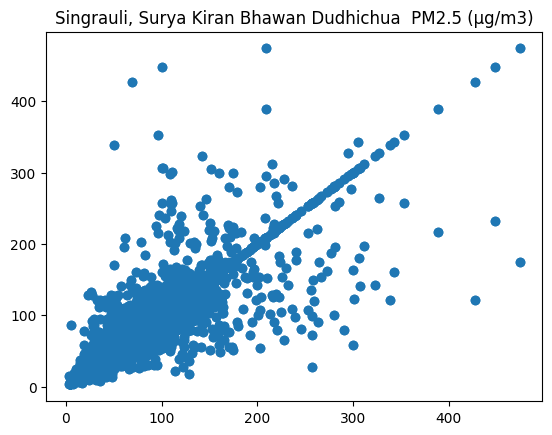

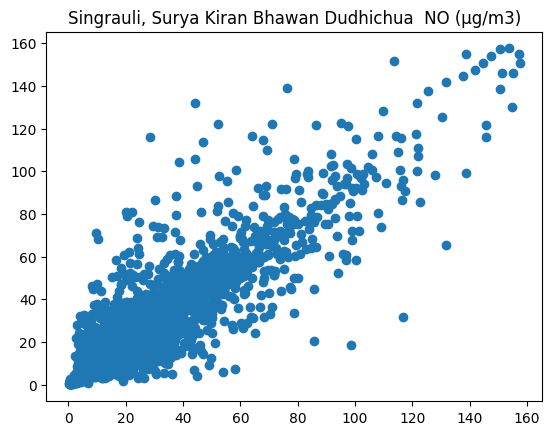

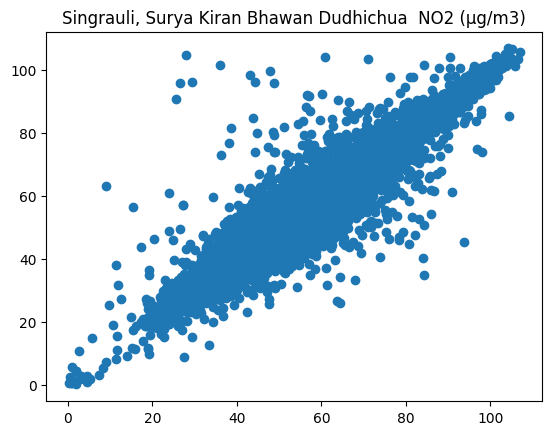

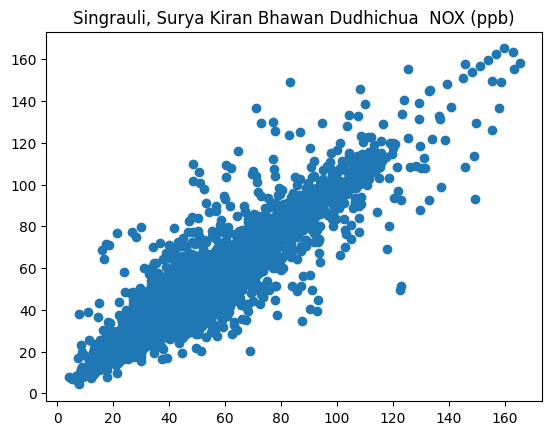

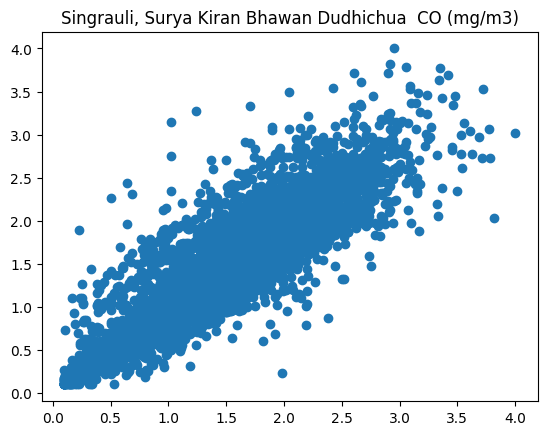

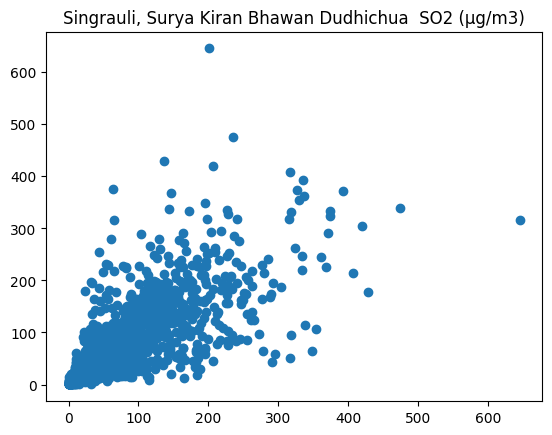

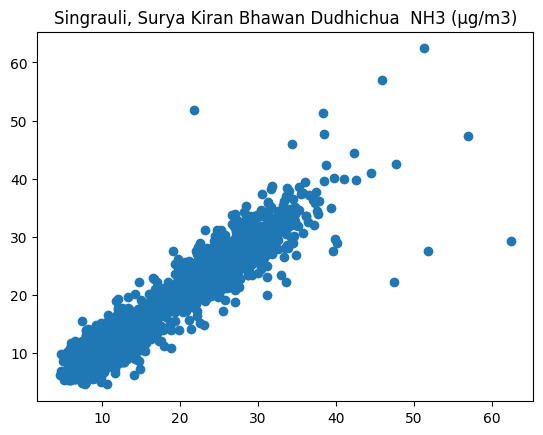

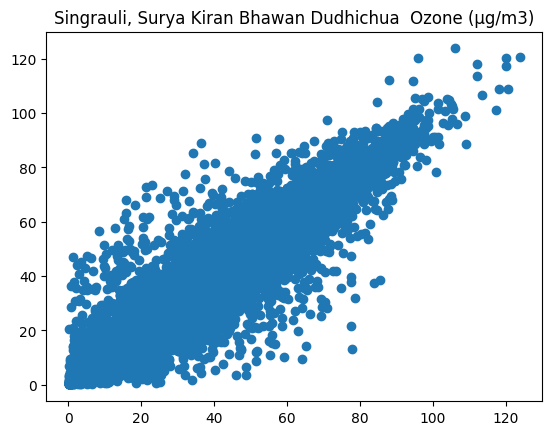

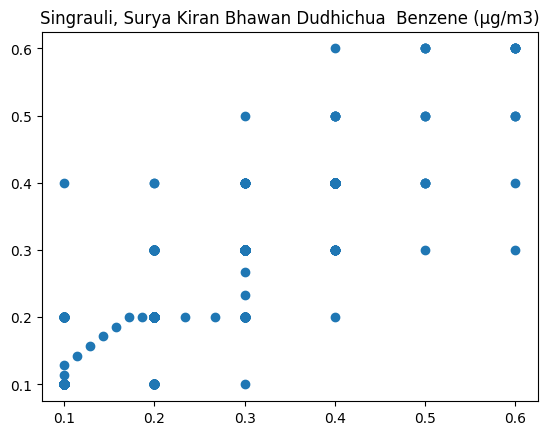

In [14]:
for column in columns:
    plt.scatter(dataSet[column], dataSet[column].shift(2))
    plt.title(column)
    plt.show()

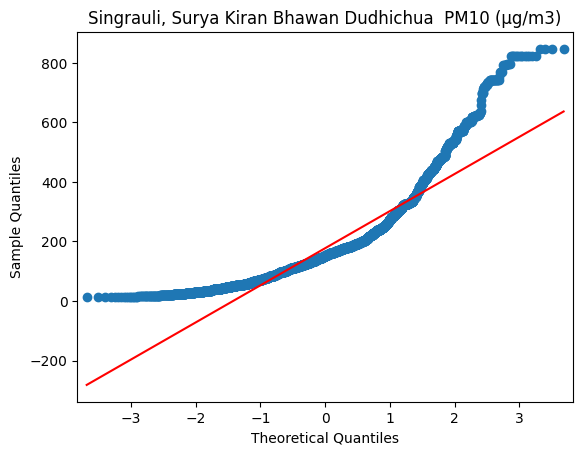

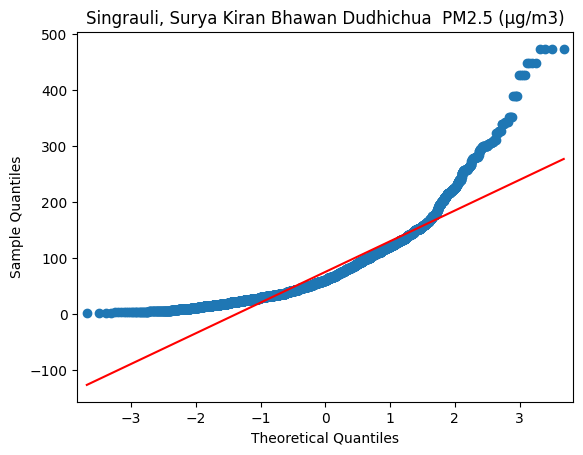

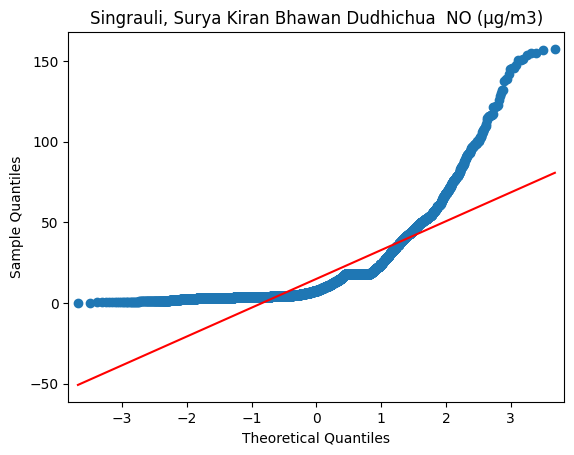

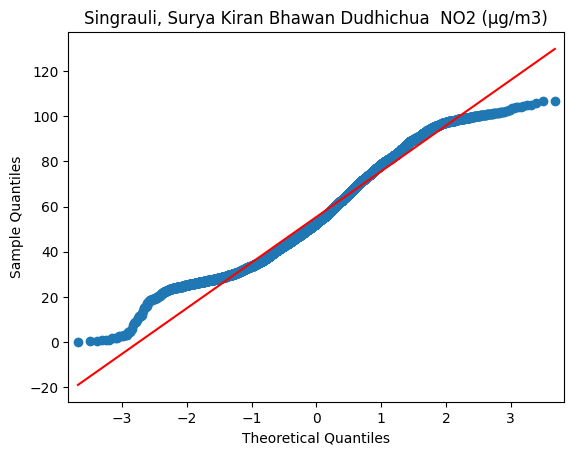

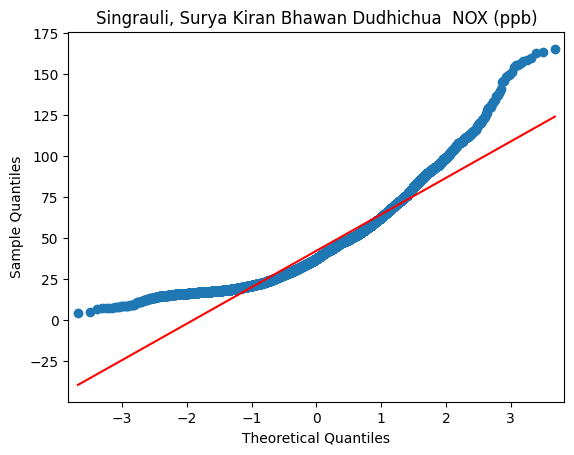

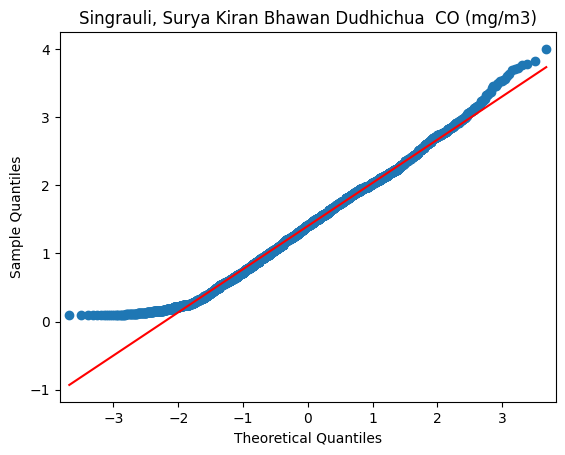

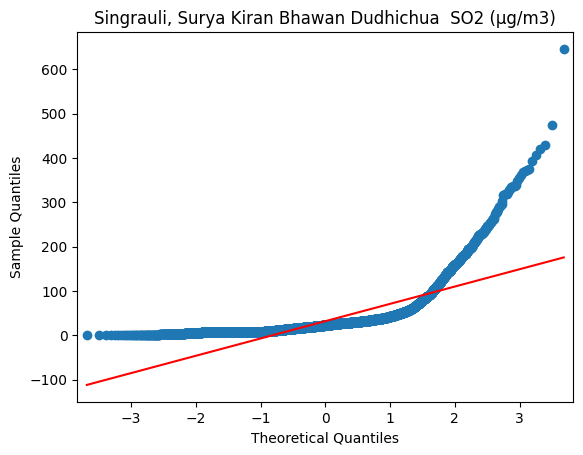

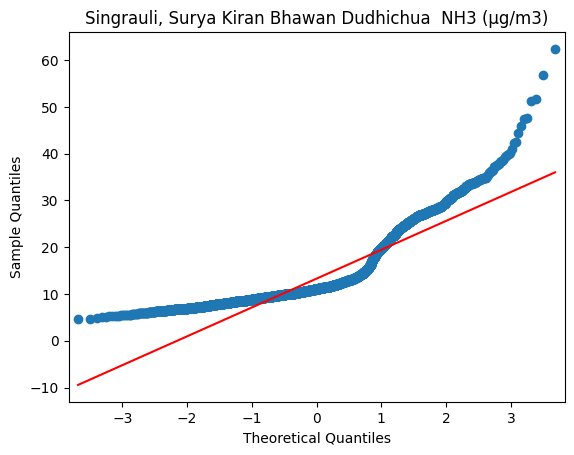

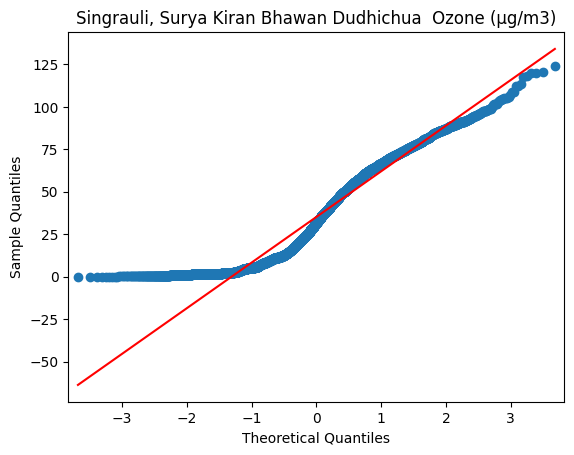

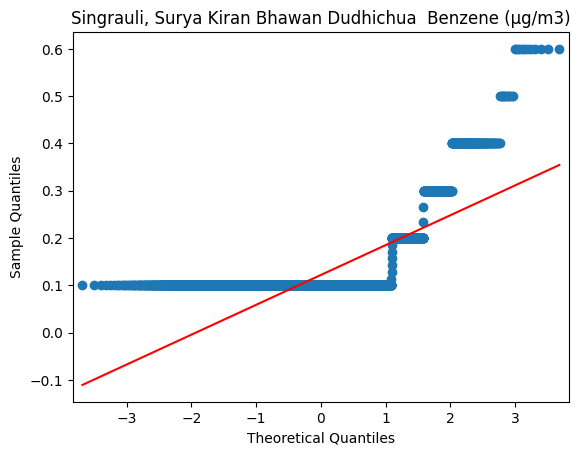

In [15]:
for column in columns:
    fig, ax = plt.subplots()
    sm.qqplot(dataSet[column], line='s', ax=ax)  
    ax.set_title(column)
    plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for column in columns:
    result = adfuller(dataSet[column])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No. of Lags : %f' % result[2])
    print('No of Observation used for ADF regression and Critical Value Prediction : %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.023314
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.159054
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -14.799960
p-value: 0.000000
No. of Lags : 11.000000
No of Observation used for ADF regression and Critical Value Prediction : 8628.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.181725
p-value: 0.000000
No. of Lags : 21.000000
No of Observation used for ADF regression and Critical Value Prediction : 8618.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -12.734220
p-value: 0.000000
No. of Lags : 24.000000
No of Observation used for ADF regression and Critical Value Prediction : 8615.000000
Critical Values:

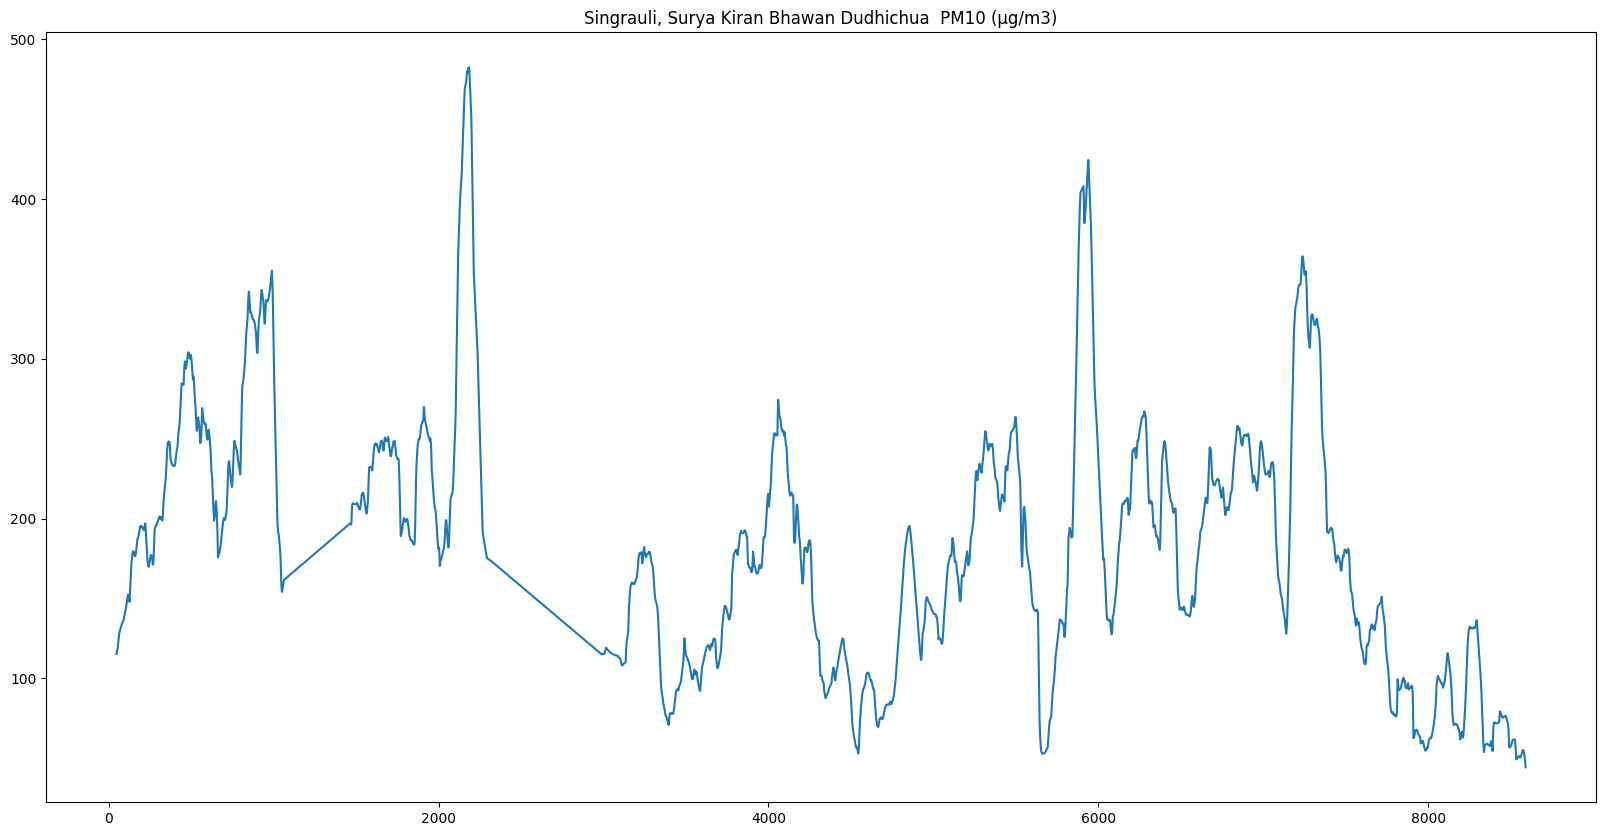

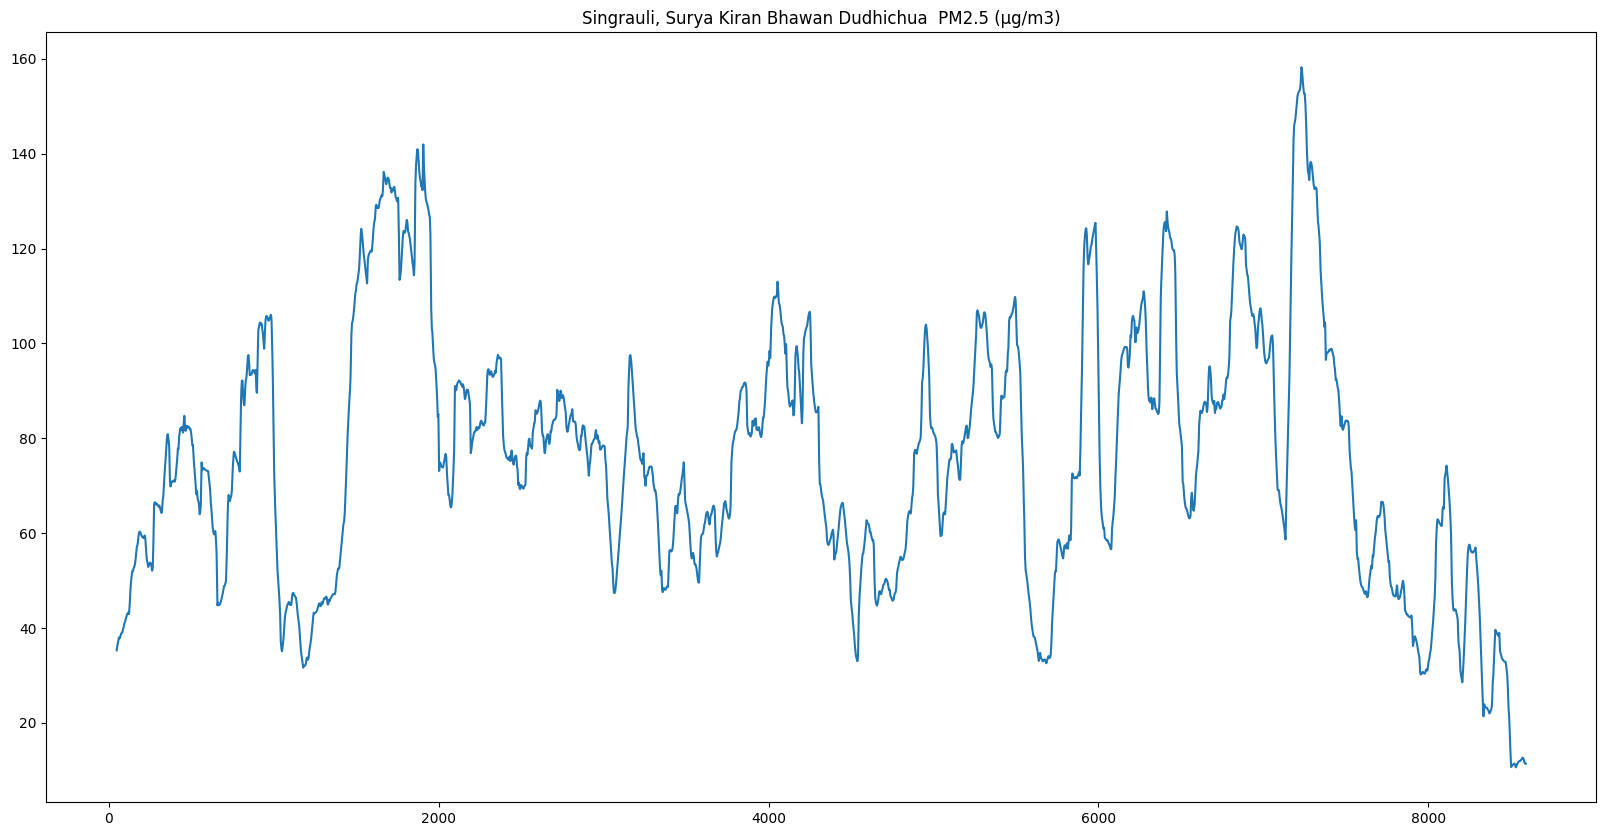

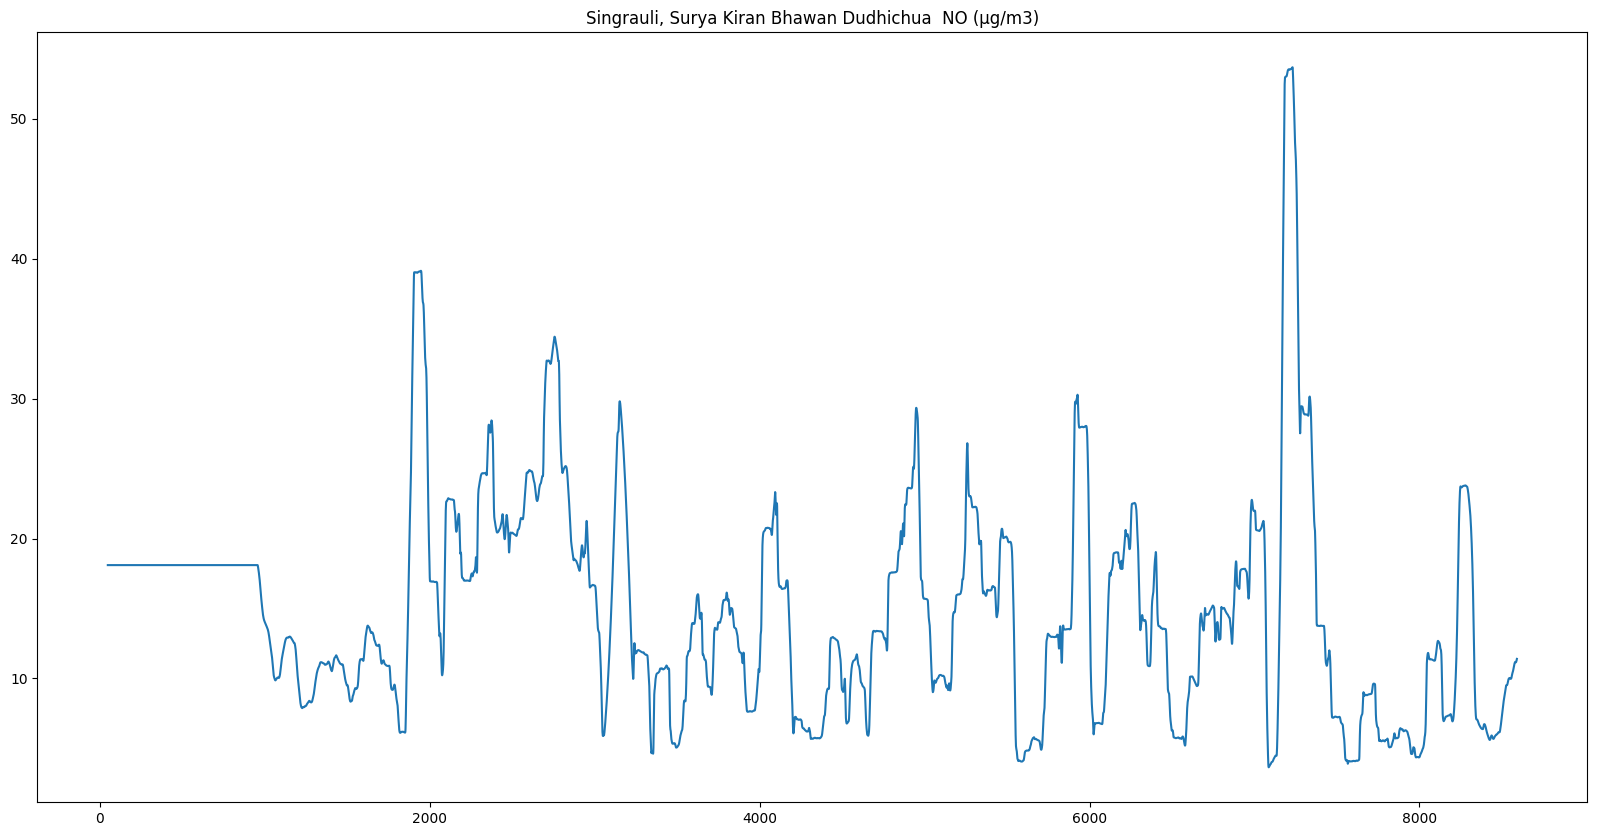

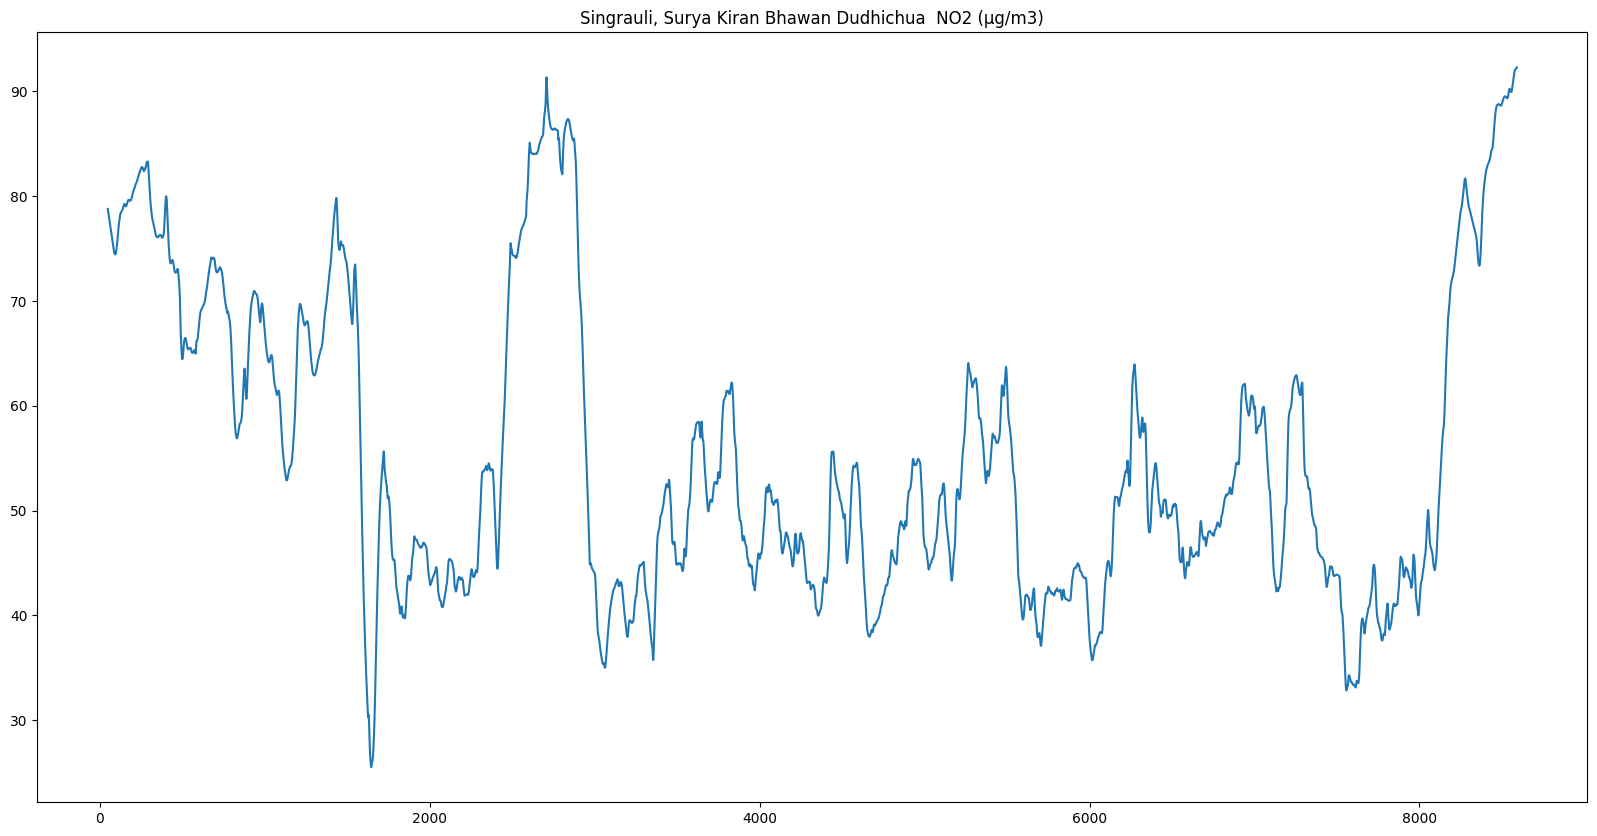

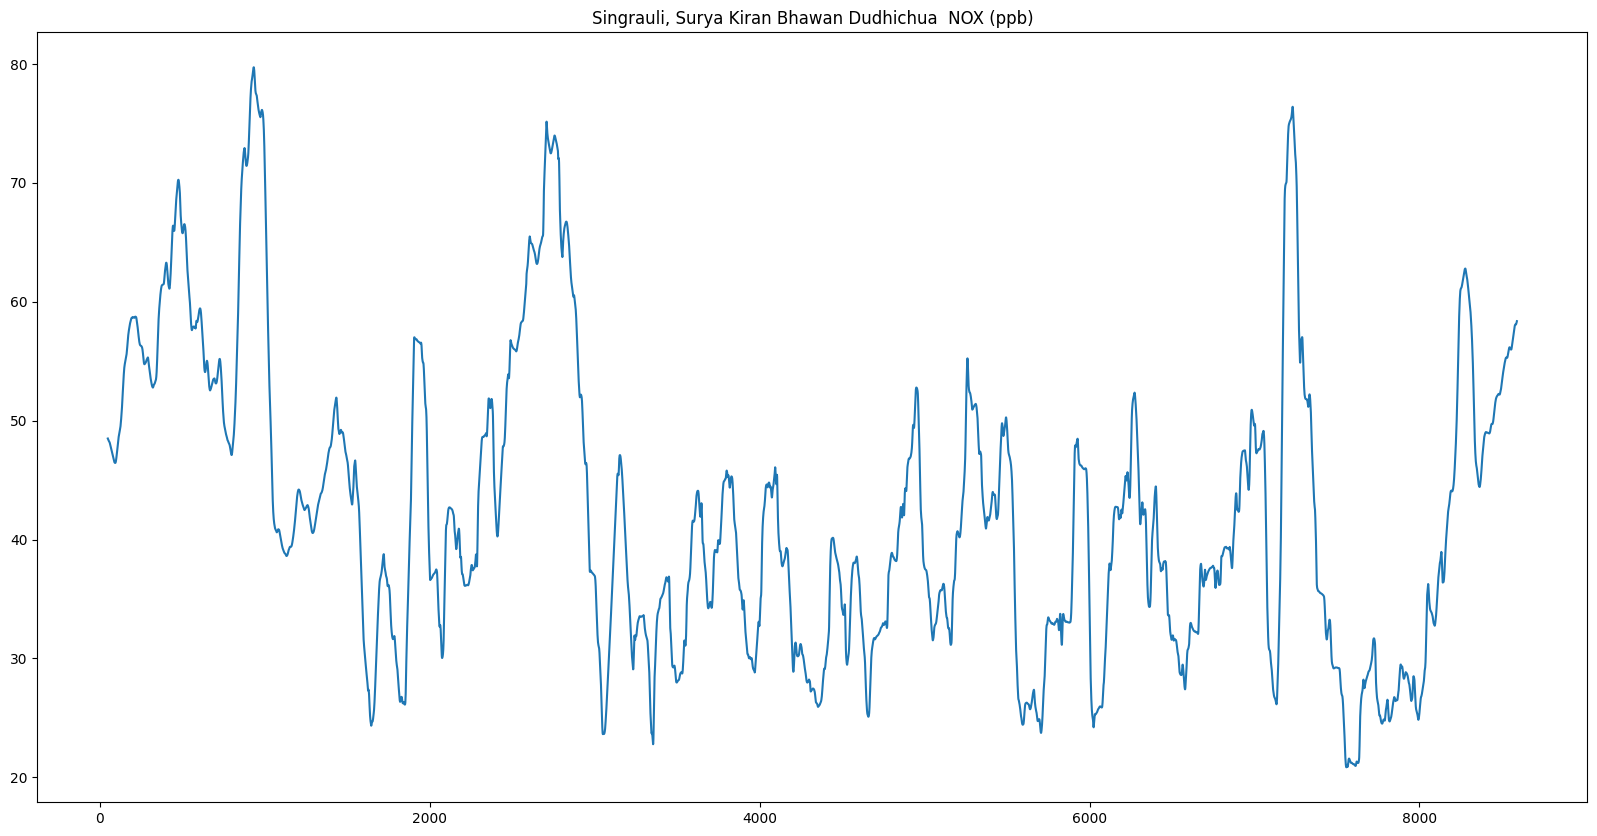

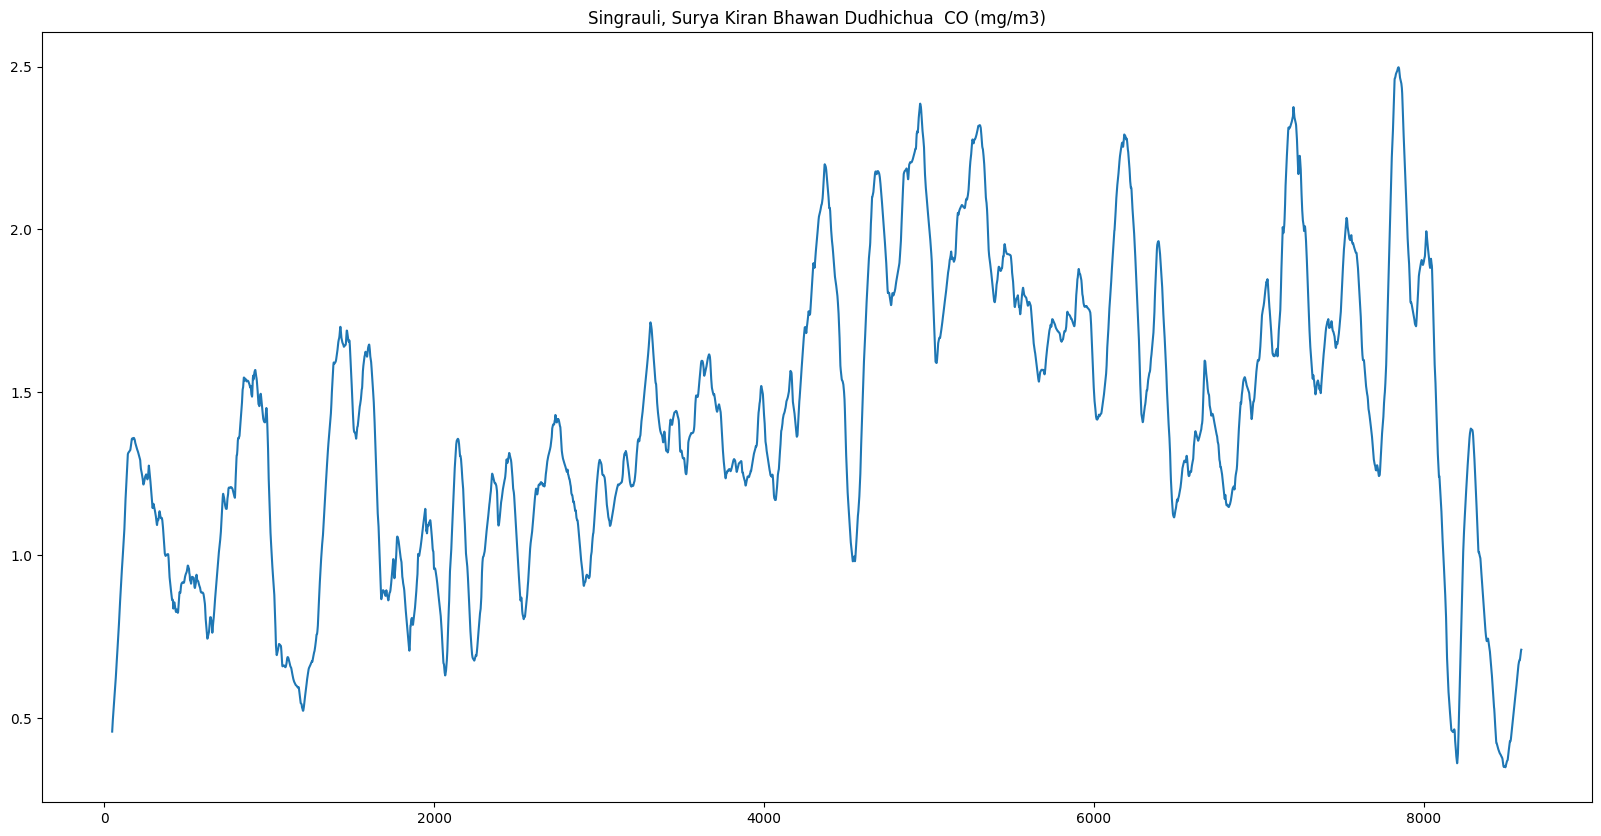

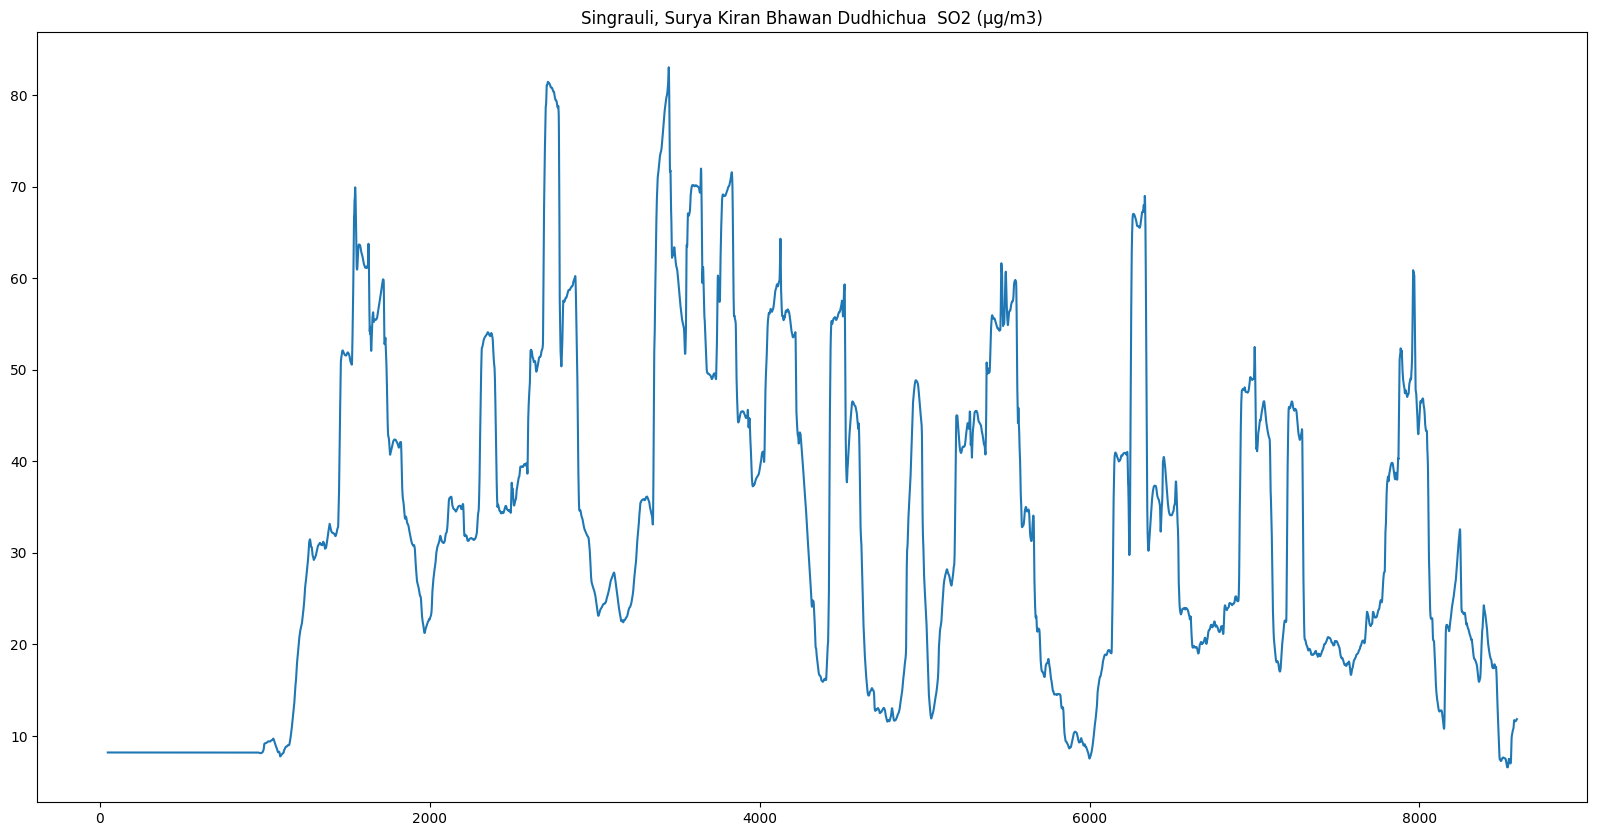

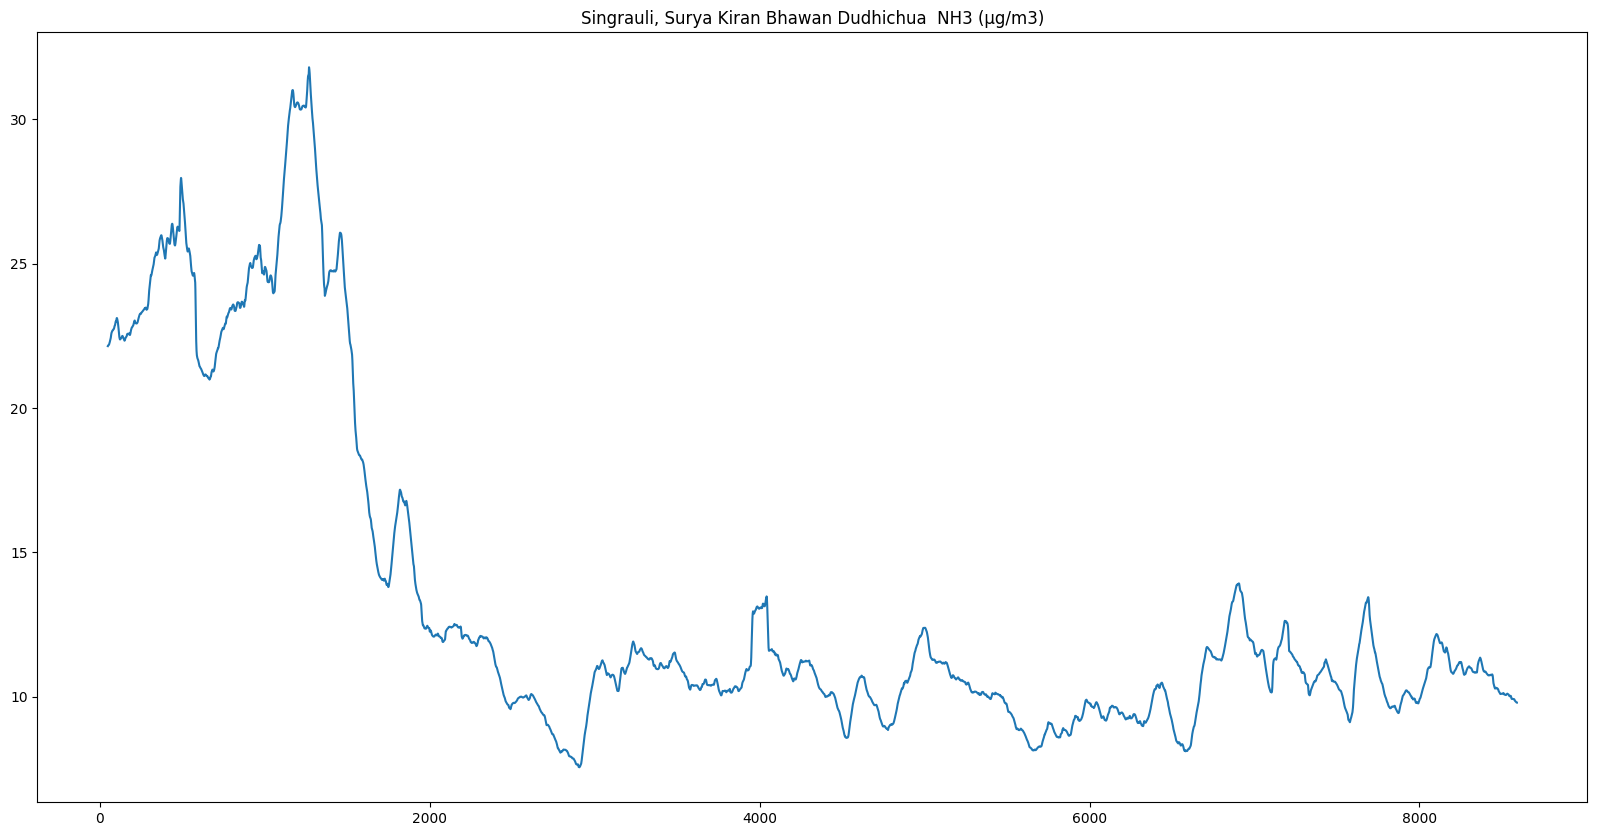

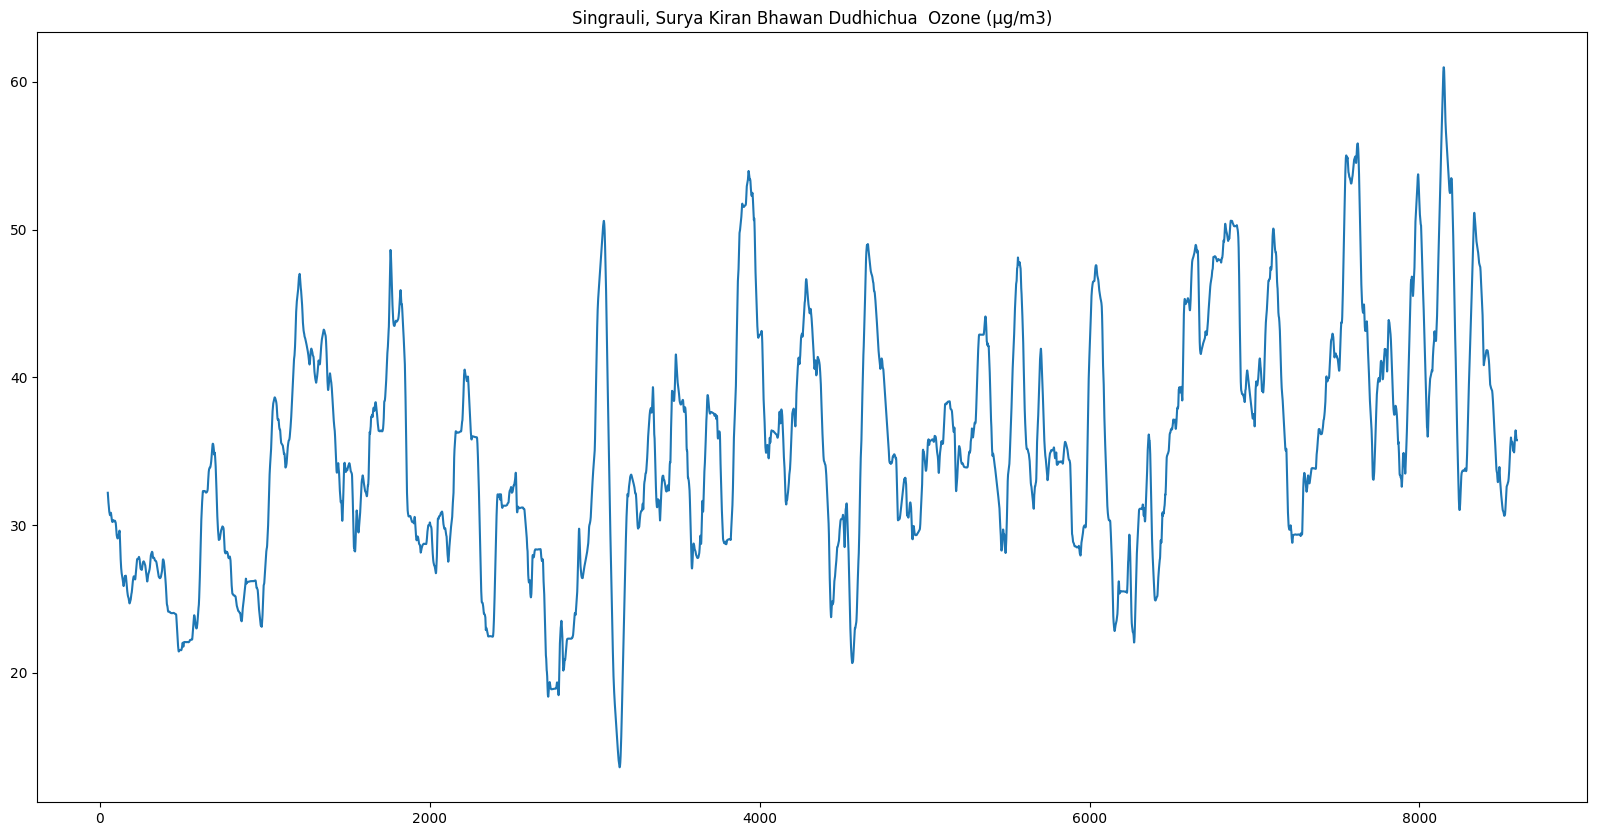

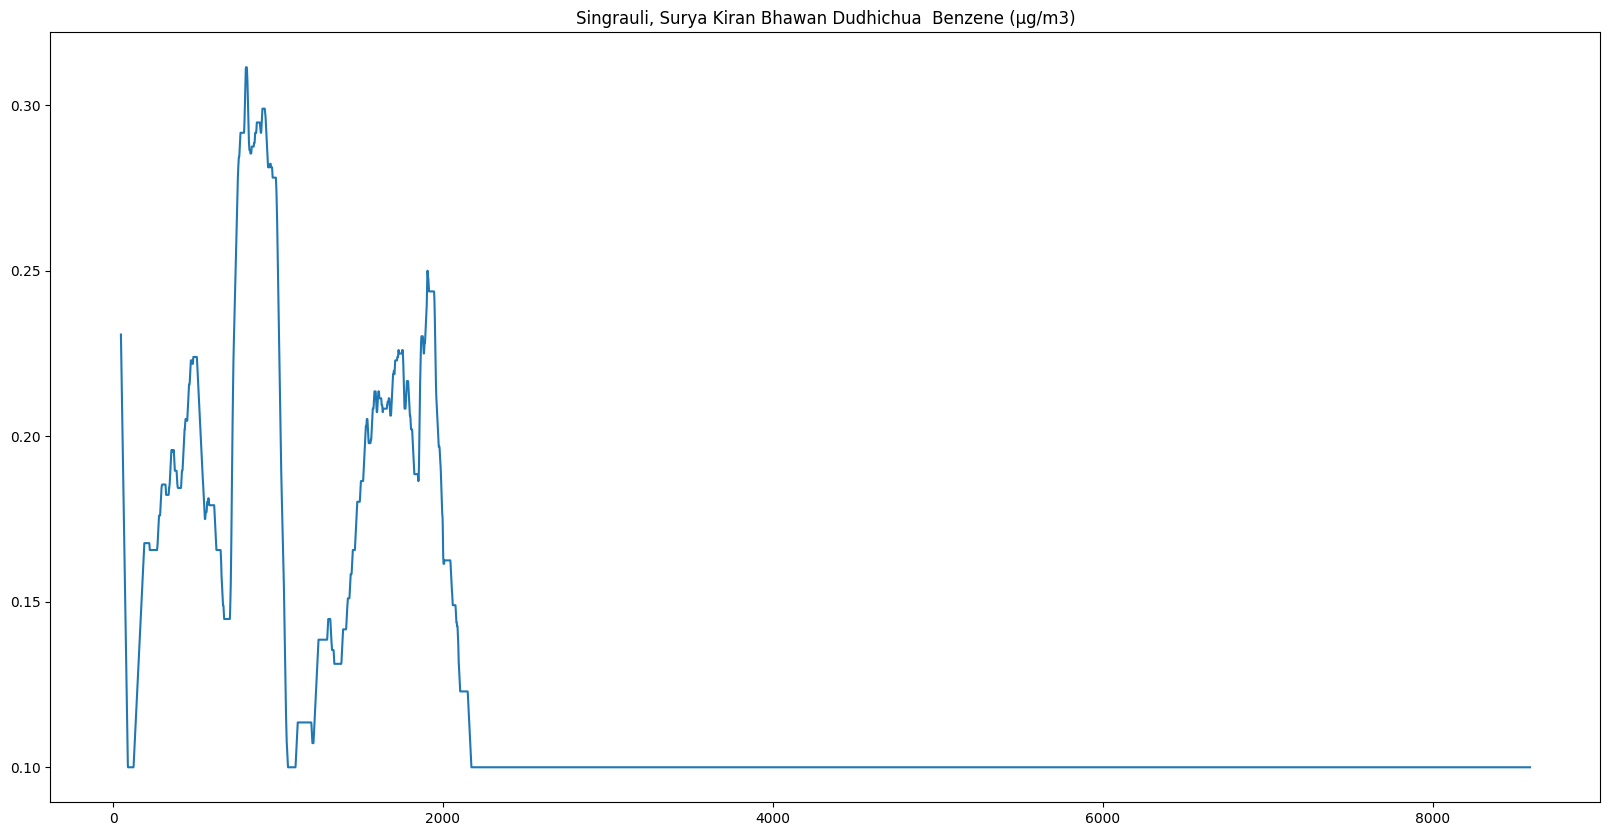

In [17]:
for column in columns:
    decompose_result_mult = seasonal_decompose(dataSet[column], period = 96, model="multiplicative")
    plt.figure(figsize=(20, 10))
    trend = decompose_result_mult.trend
    plt.plot(trend)
    plt.title(column)
    plt.show()

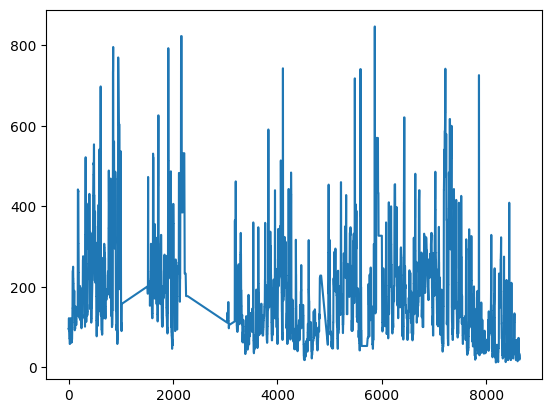

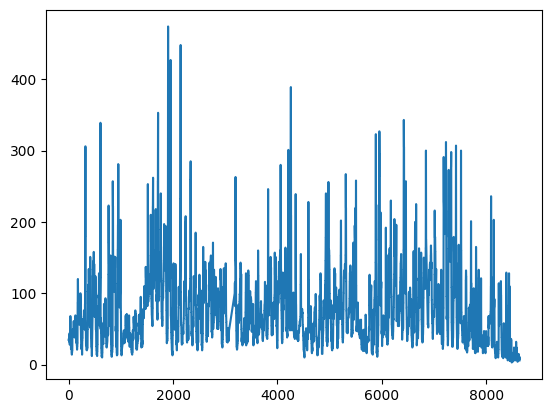

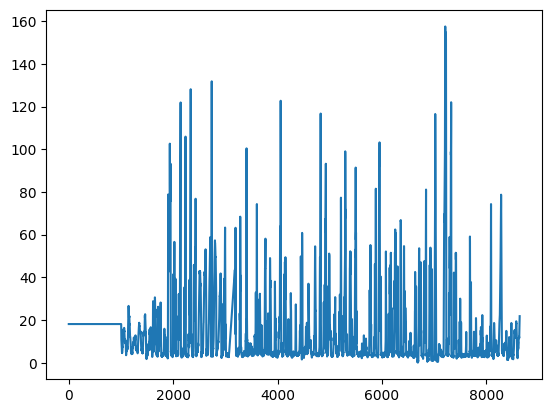

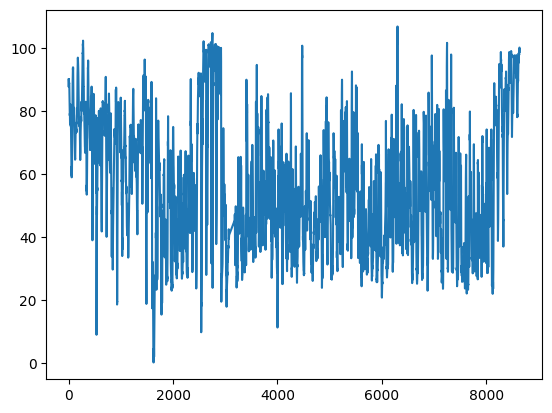

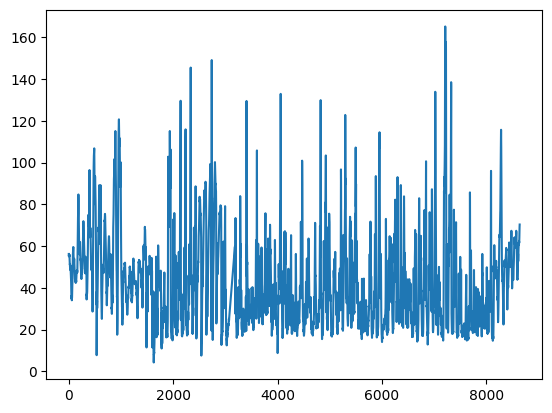

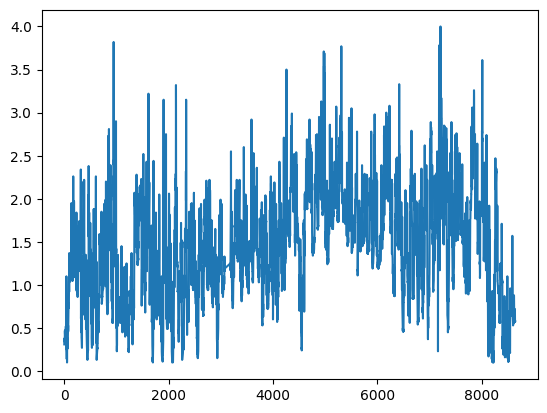

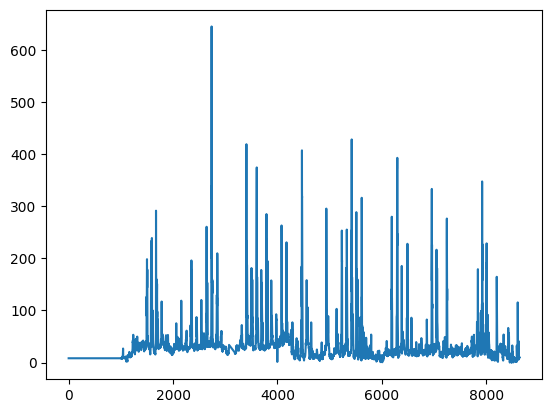

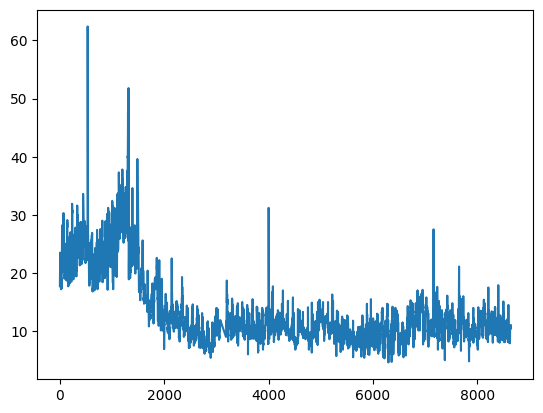

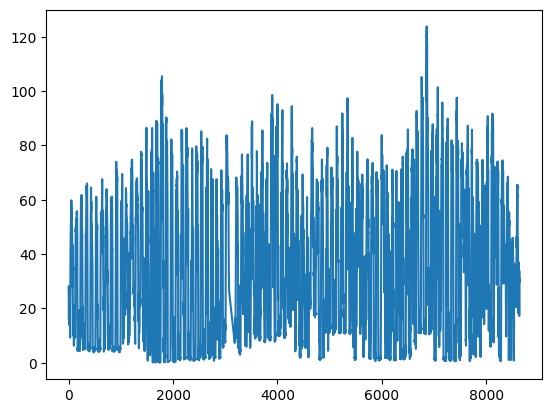

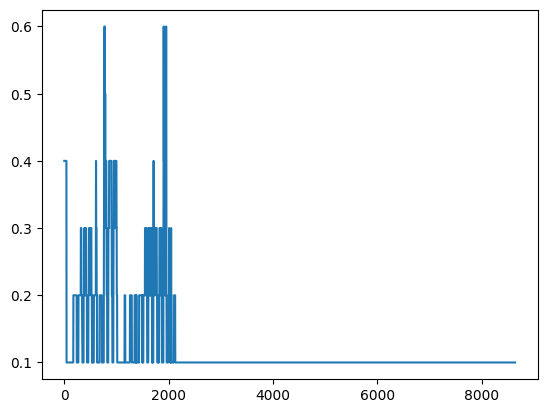

In [18]:
for column in columns:
    dataSet[column].plot()
    plt.show()


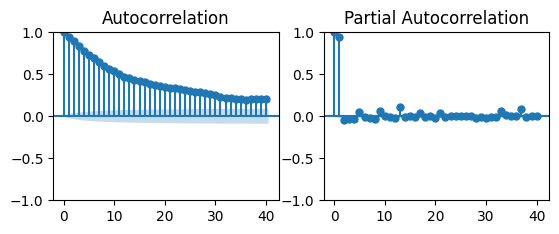

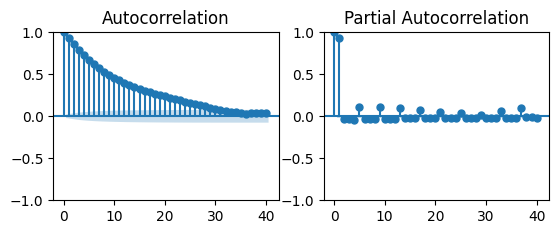

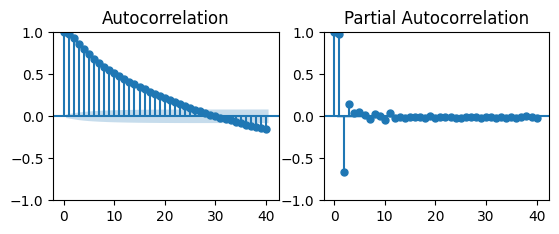

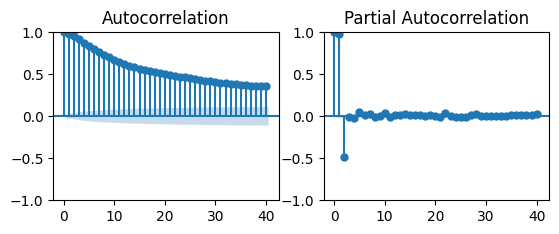

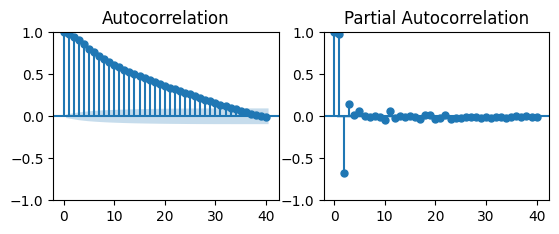

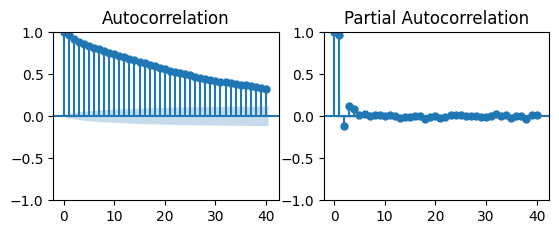

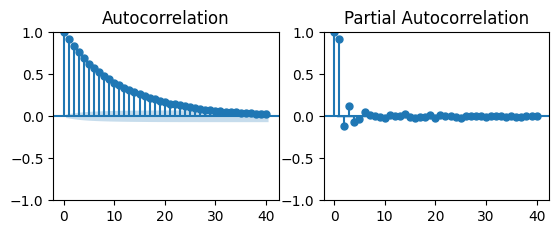

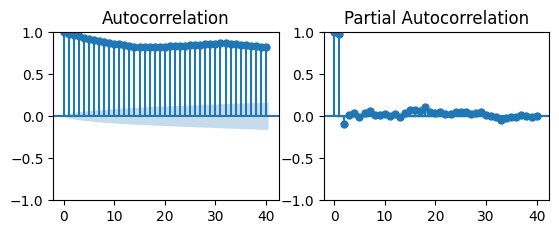

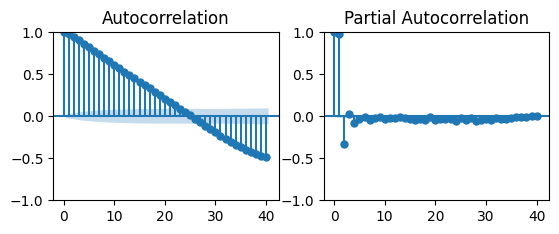

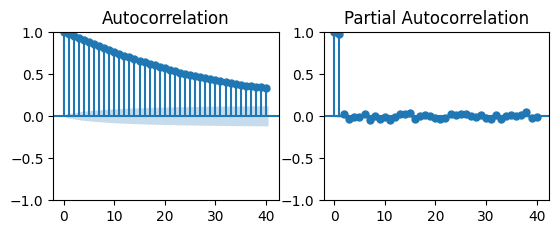

In [19]:
for column in columns:
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    plot_acf(dataSet[column], ax = ax1)
    plot_pacf(dataSet[column], ax = ax2)
    plt.show()

In [20]:
from statsmodels.tsa.ar_model import AutoReg

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8640
Model:                                                        AutoReg(2)   Log Likelihood              -44166.077
Method:                                                  Conditional MLE   S.D. of innovations             40.208
Date:                                                   Tue, 27 Jun 2023   AIC                          88340.154
Time:                                                           22:39:02   BIC                          88368.410
Sample:                                                                2   HQIC                         88349.788
                                                                    8640                                         
                                                               coef    std err          

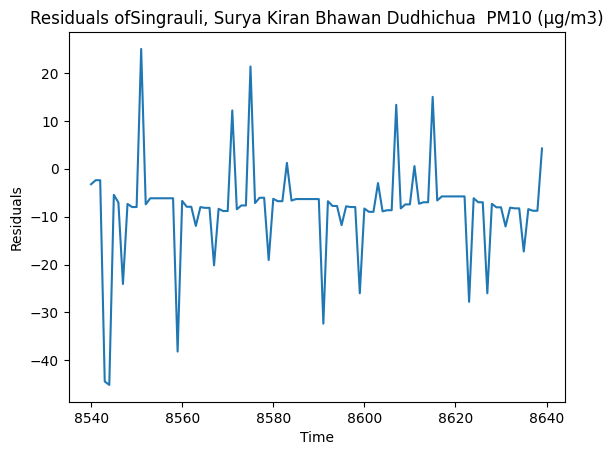

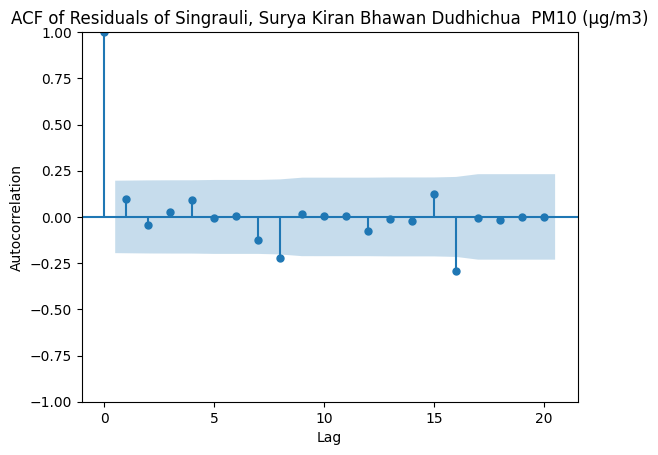

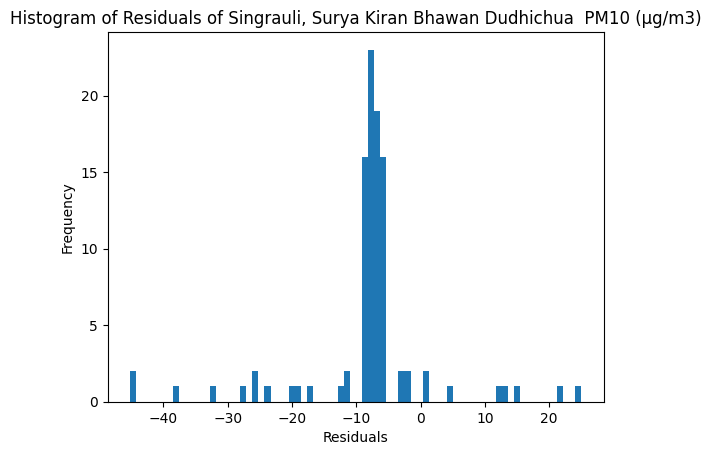

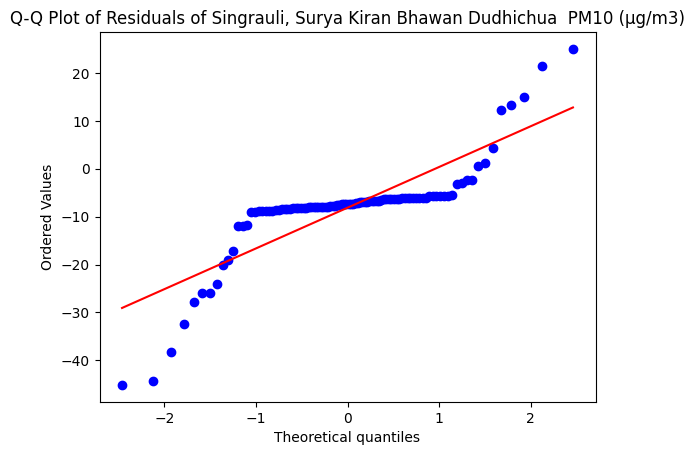

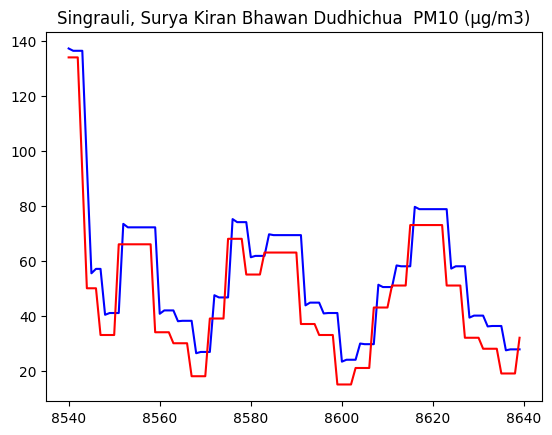

Mean : 177.463079
Root Mean Squared Error : 12.807041
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -38120.032
Method:                                                   Conditional MLE   S.D. of innovations             19.968
Date:                                                    Tue, 27 Jun 2023   AIC                          76248.064
Time:                                                            22:39:04   BIC                          76276.320
Sample:                                                                 2   HQIC                         76257.698
                                                                     8640                                         
                          

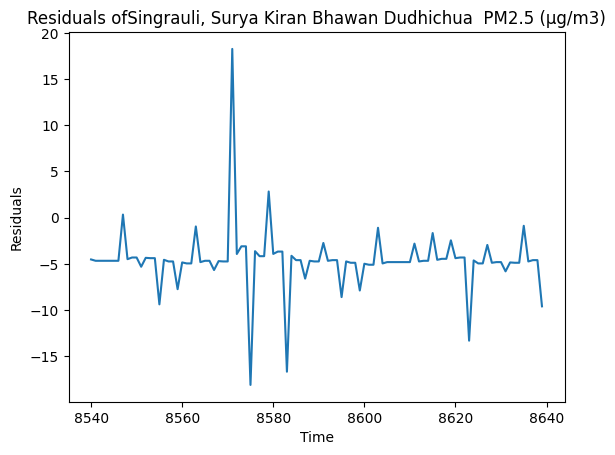

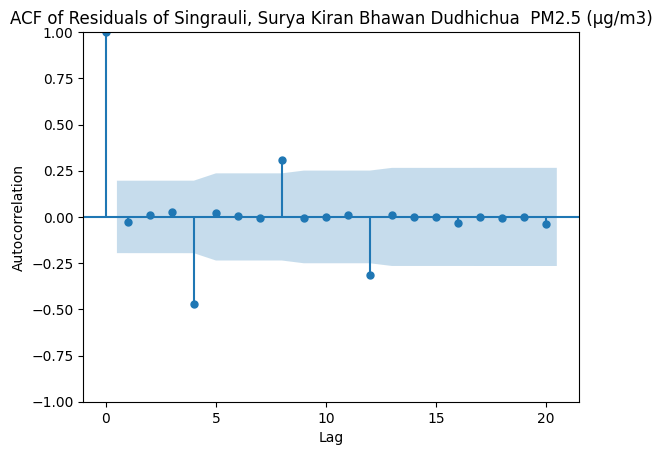

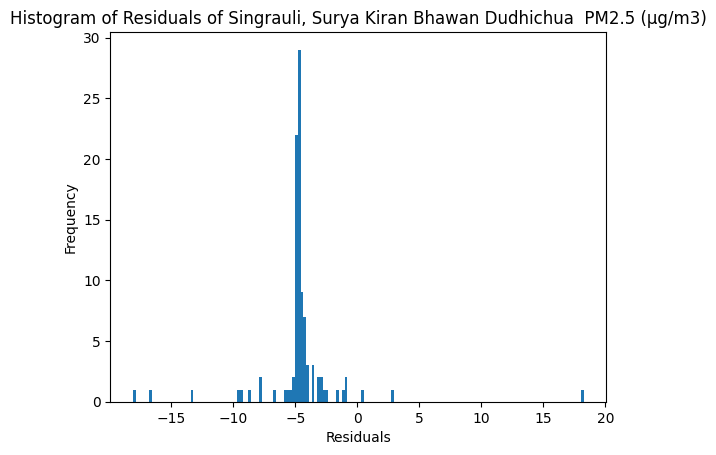

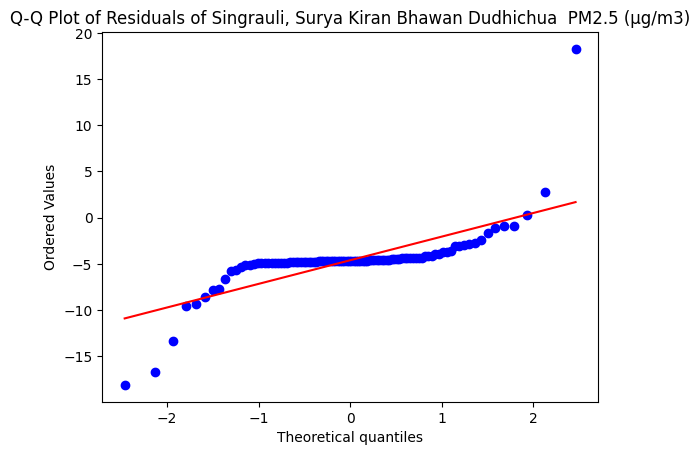

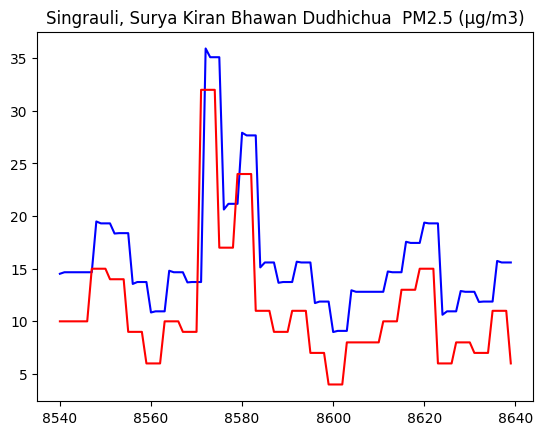

Mean : 75.557350
Root Mean Squared Error : 5.739367
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood              -21144.423
Method:                                                Conditional MLE   S.D. of innovations              2.798
Date:                                                 Tue, 27 Jun 2023   AIC                          42296.847
Time:                                                         22:39:06   BIC                          42325.103
Sample:                                                              2   HQIC                         42306.481
                                                                  8640                                         
                                                    

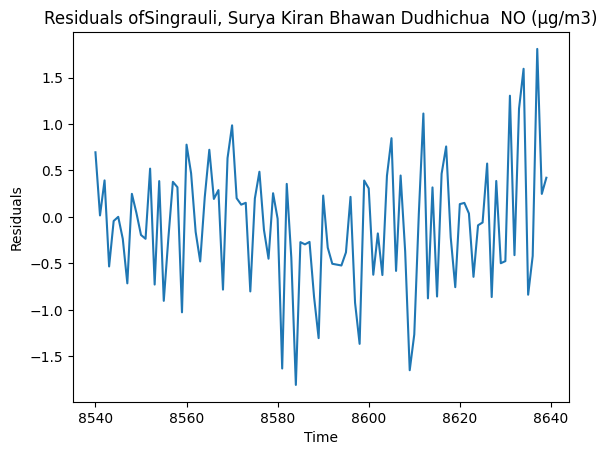

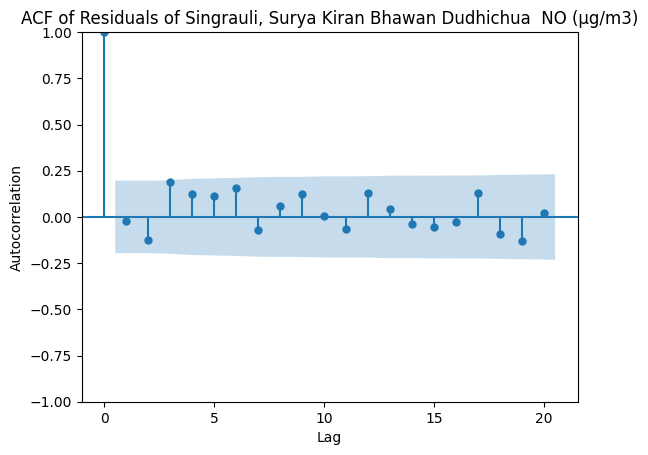

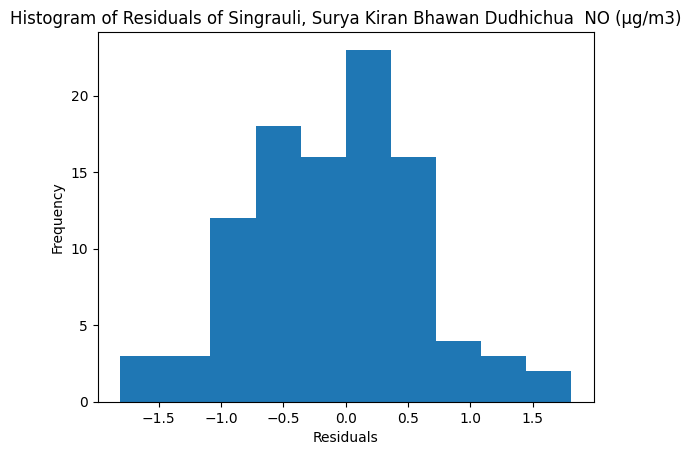

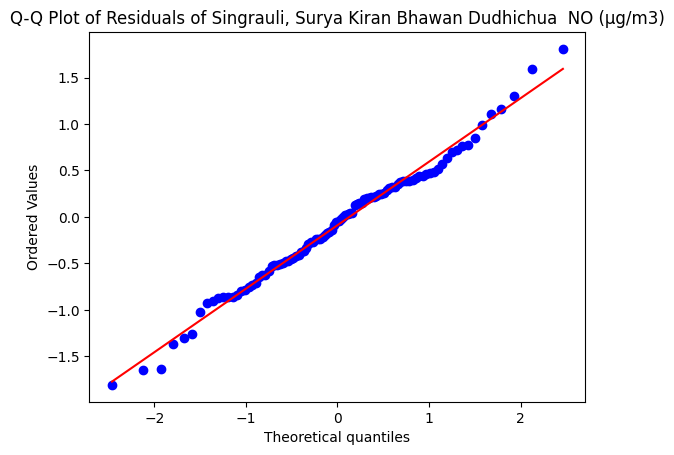

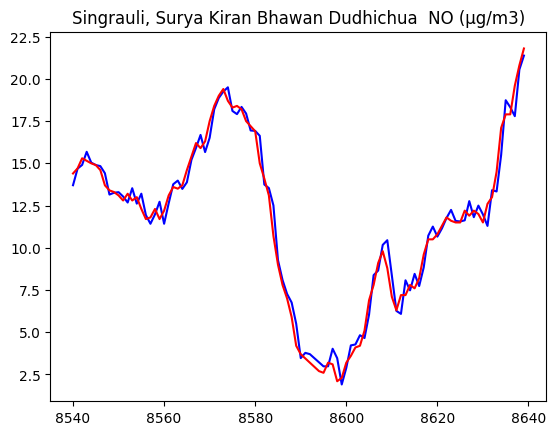

Mean : 14.940208
Root Mean Squared Error : 0.679109
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -21776.975
Method:                                                 Conditional MLE   S.D. of innovations              3.011
Date:                                                  Tue, 27 Jun 2023   AIC                          43561.949
Time:                                                          22:39:07   BIC                          43590.205
Sample:                                                               2   HQIC                         43571.584
                                                                   8640                                         
                                            

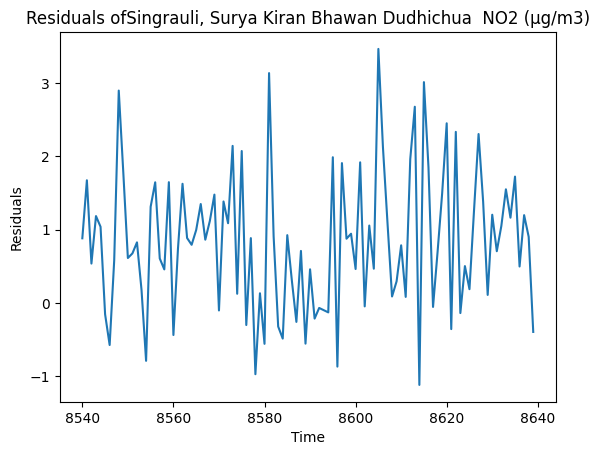

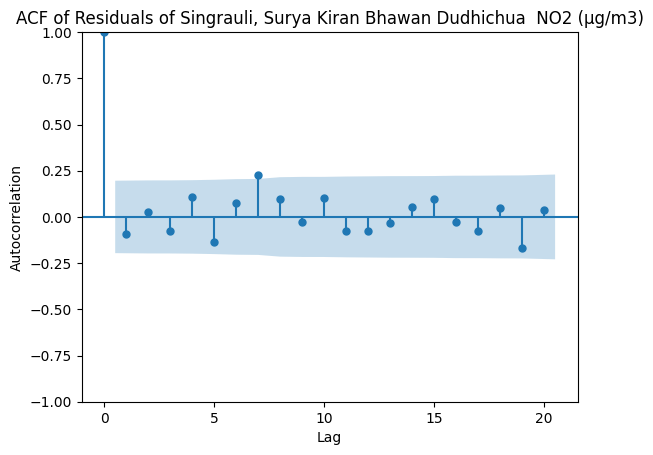

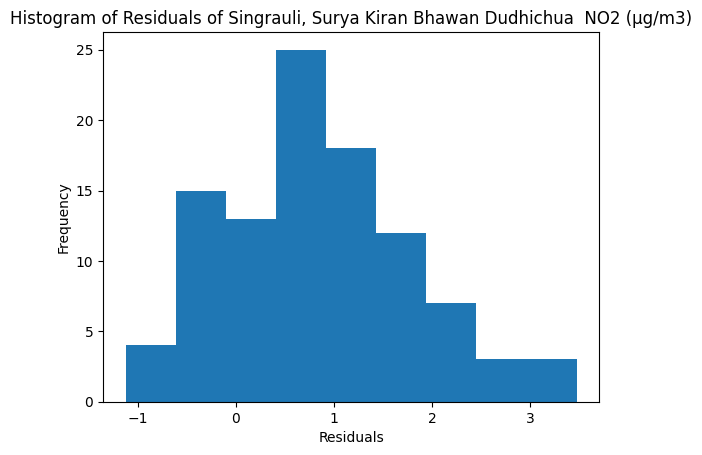

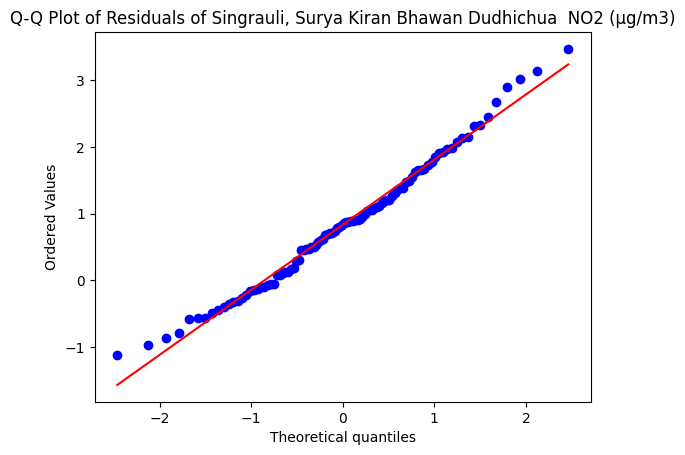

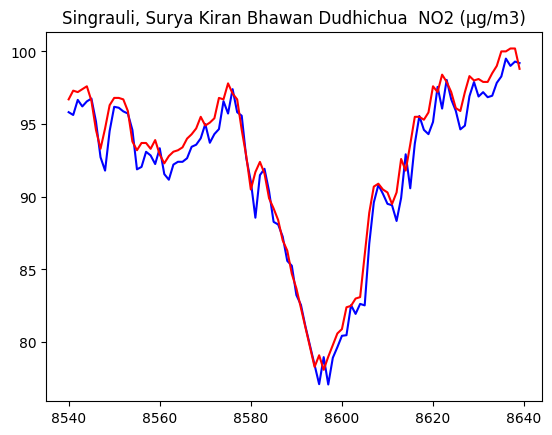

Mean : 55.430689
Root Mean Squared Error : 1.273081
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8640
Model:                                                     AutoReg(2)   Log Likelihood              -21178.954
Method:                                               Conditional MLE   S.D. of innovations              2.809
Date:                                                Tue, 27 Jun 2023   AIC                          42365.907
Time:                                                        22:39:09   BIC                          42394.163
Sample:                                                             2   HQIC                         42375.542
                                                                 8640                                         
                                                            

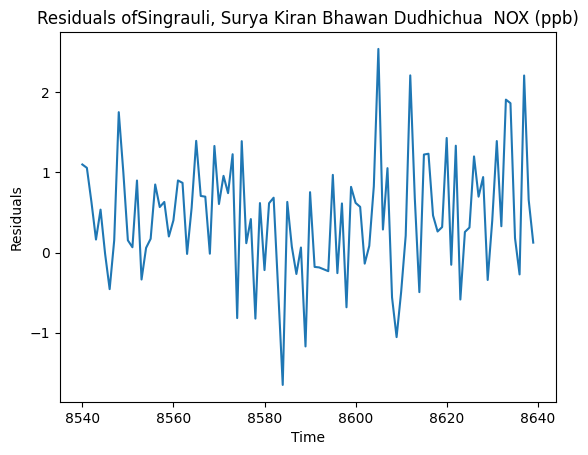

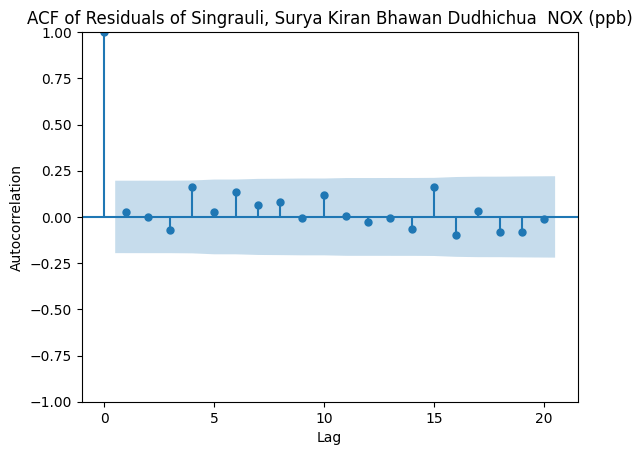

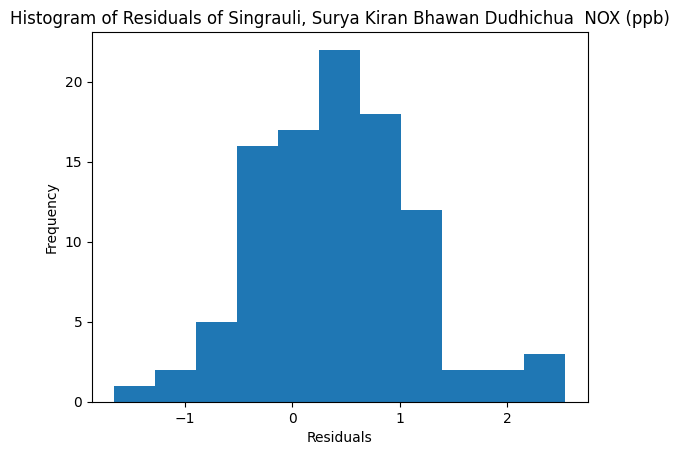

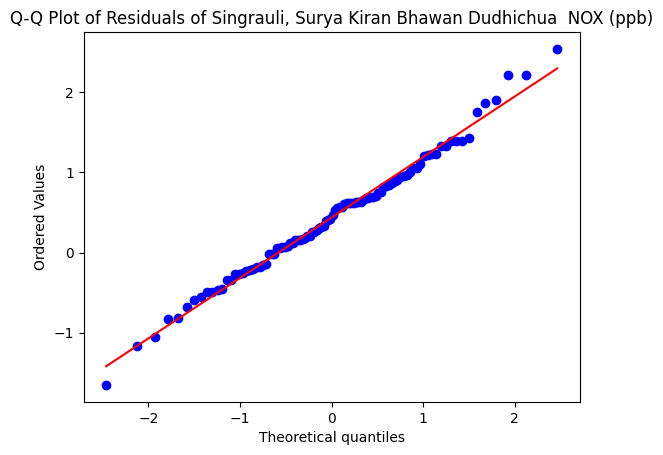

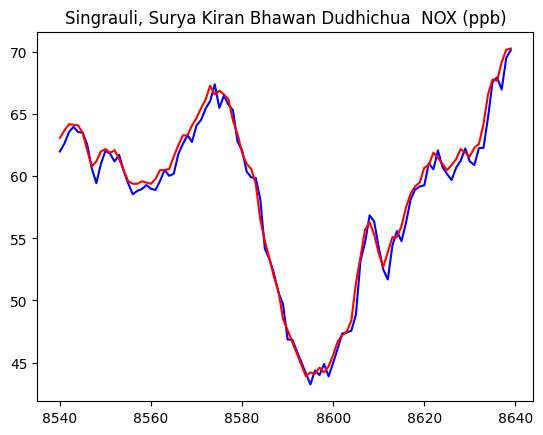

Mean : 42.328802
Root Mean Squared Error : 0.862718
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood                3197.737
Method:                                                Conditional MLE   S.D. of innovations              0.167
Date:                                                 Tue, 27 Jun 2023   AIC                          -6387.475
Time:                                                         22:39:10   BIC                          -6359.219
Sample:                                                              2   HQIC                         -6377.840
                                                                  8640                                         
                                                    

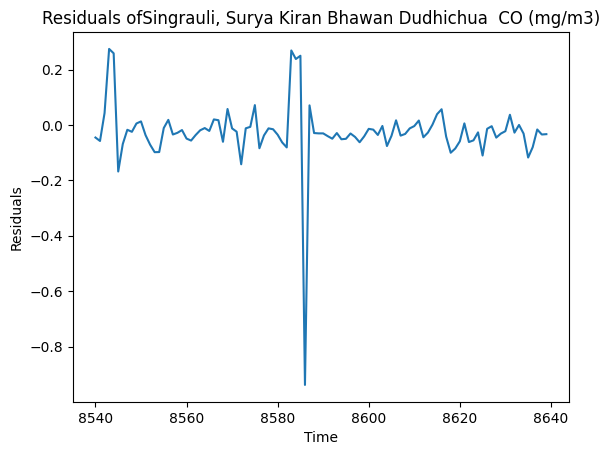

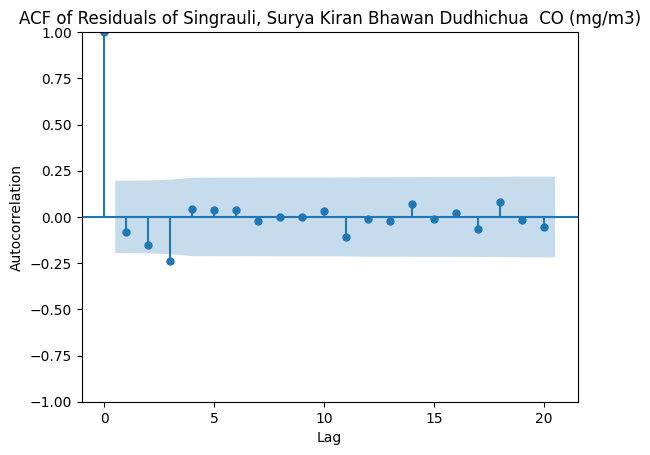

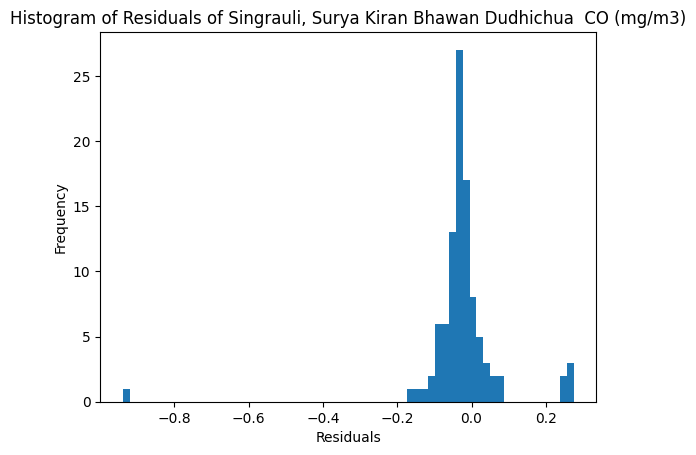

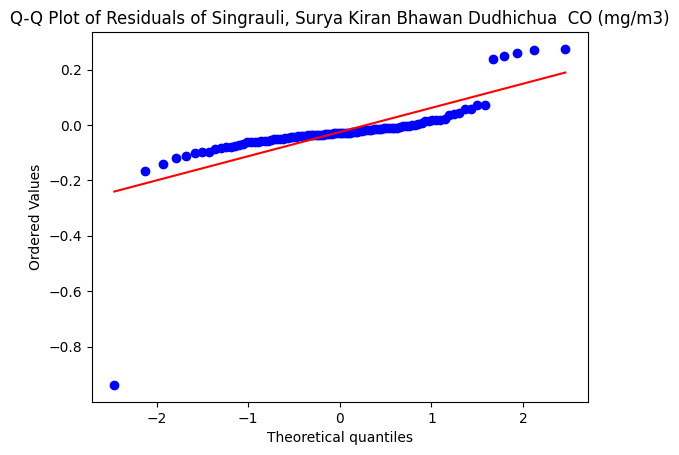

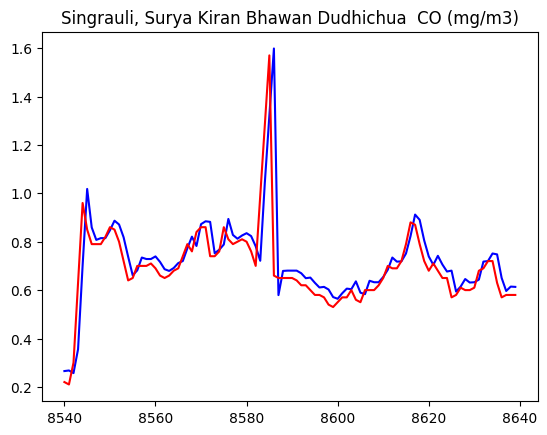

Mean : 1.401927
Root Mean Squared Error : 0.121037
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -35690.757
Method:                                                 Conditional MLE   S.D. of innovations             15.073
Date:                                                  Tue, 27 Jun 2023   AIC                          71389.514
Time:                                                          22:39:12   BIC                          71417.770
Sample:                                                               2   HQIC                         71399.148
                                                                   8640                                         
                                             

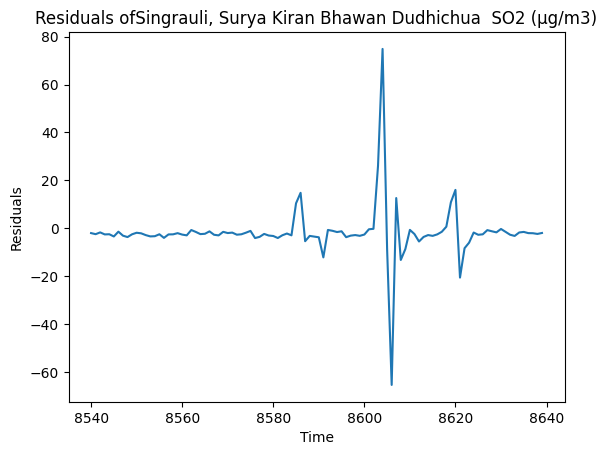

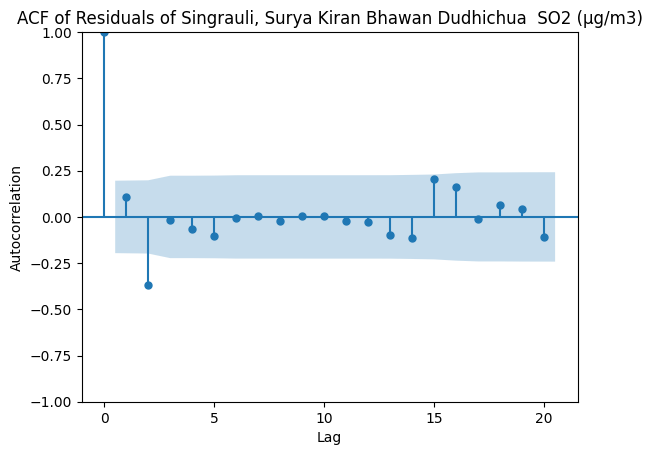

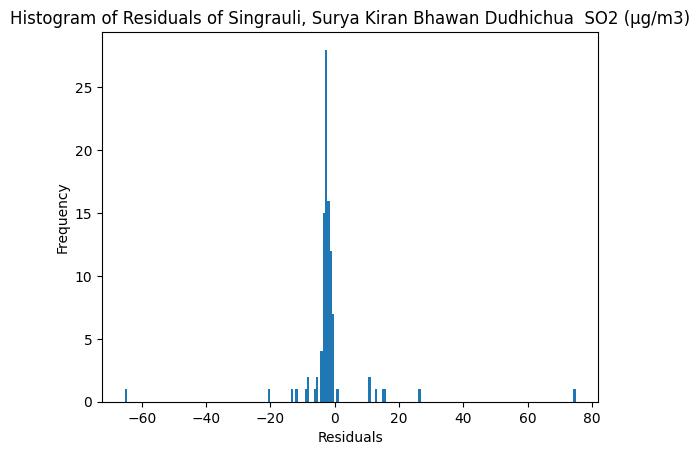

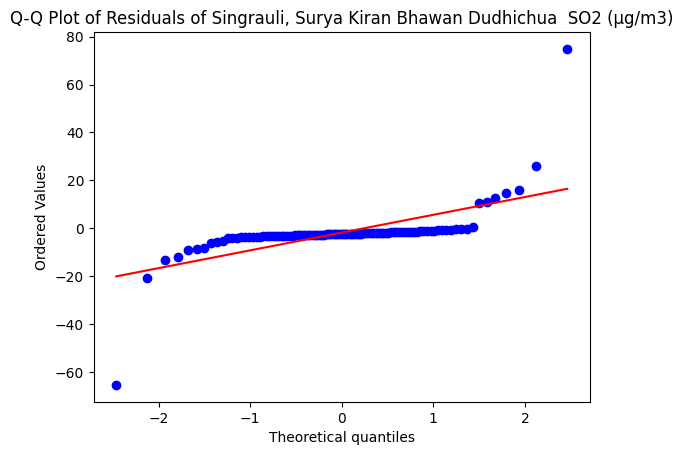

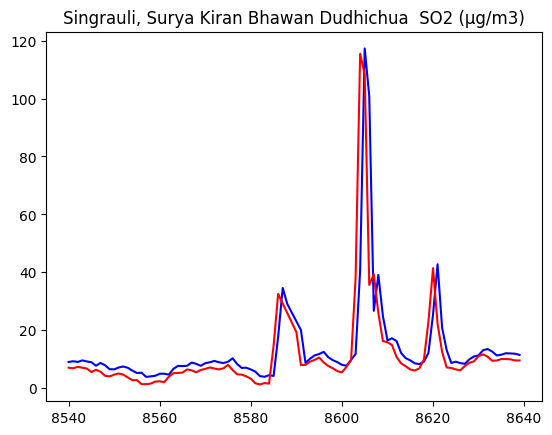

Mean : 31.923270
Root Mean Squared Error : 11.393467
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -12626.145
Method:                                                 Conditional MLE   S.D. of innovations              1.044
Date:                                                  Tue, 27 Jun 2023   AIC                          25260.290
Time:                                                          22:39:14   BIC                          25288.546
Sample:                                                               2   HQIC                         25269.925
                                                                   8640                                         
                                           

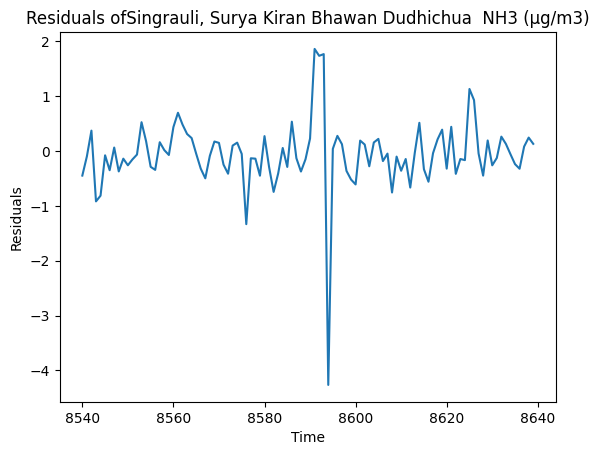

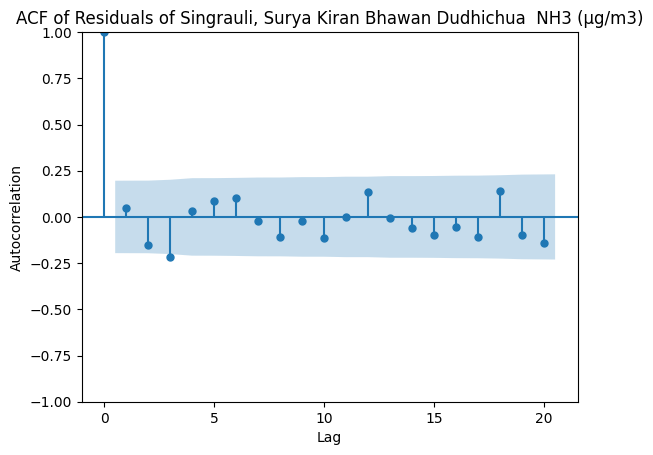

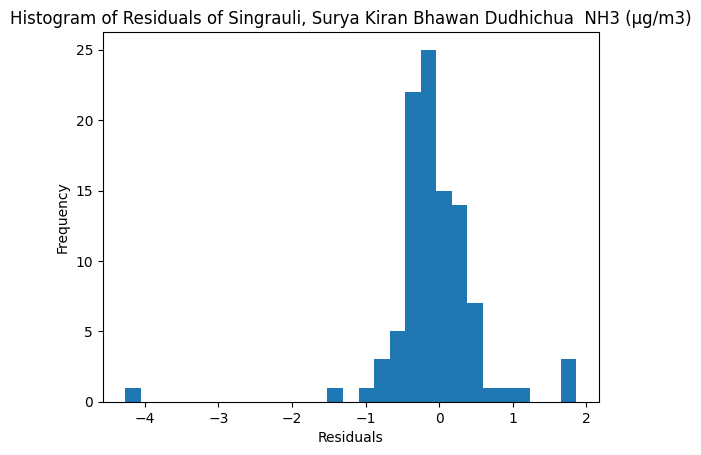

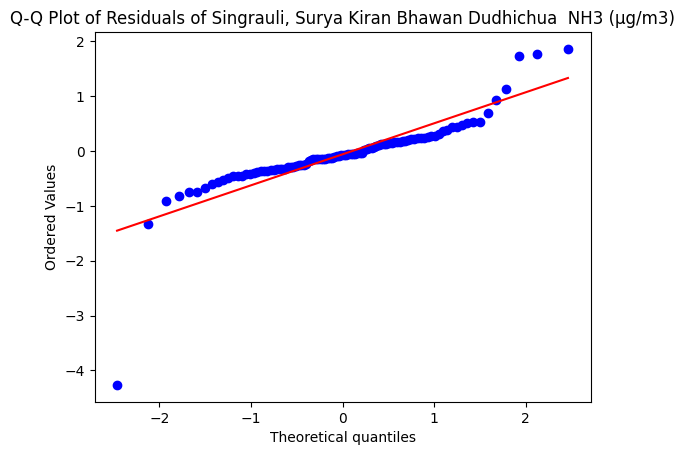

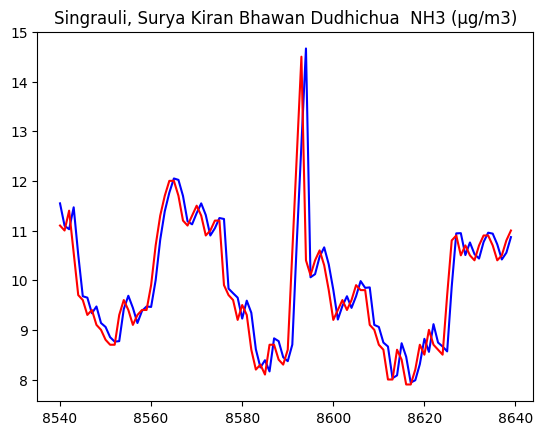

Mean : 13.286956
Root Mean Squared Error : 0.650620
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -26584.645
Method:                                                   Conditional MLE   S.D. of innovations              5.252
Date:                                                    Tue, 27 Jun 2023   AIC                          53177.289
Time:                                                            22:39:15   BIC                          53205.545
Sample:                                                                 2   HQIC                         53186.923
                                                                     8640                                         
                            

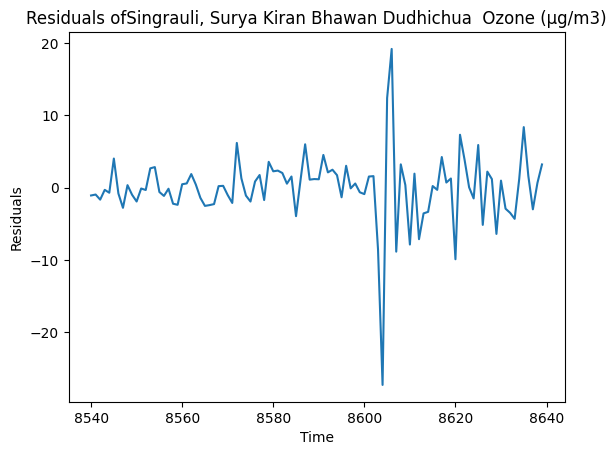

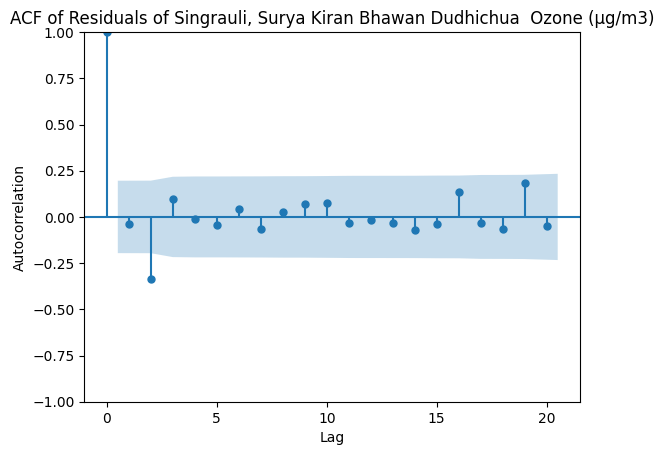

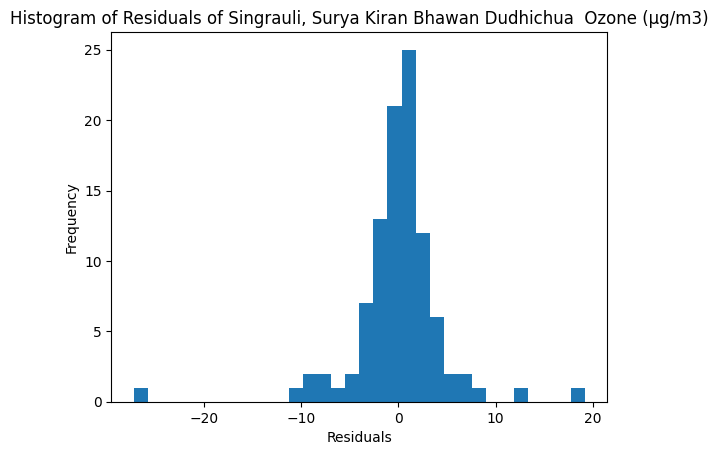

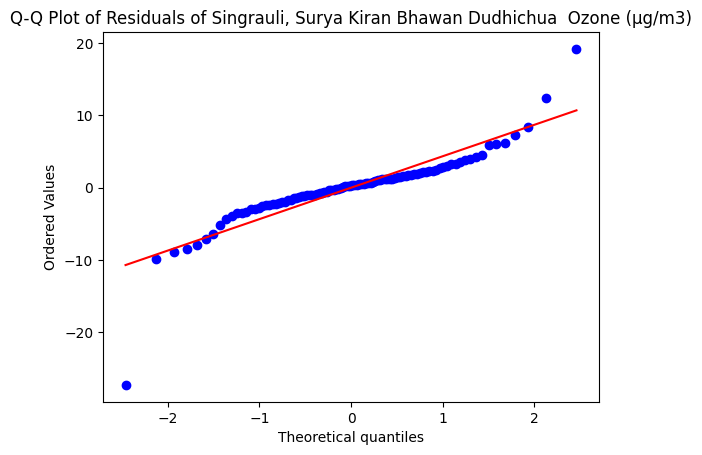

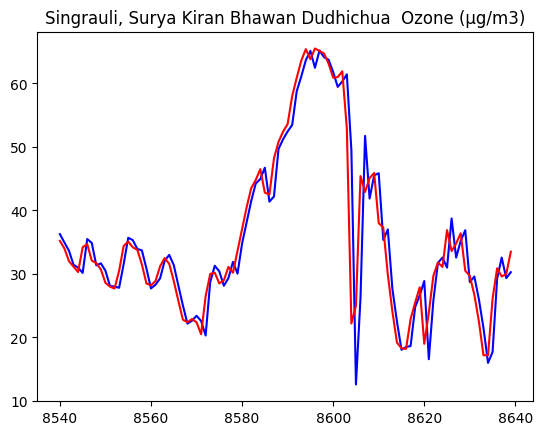

Mean : 35.193970
Root Mean Squared Error : 4.775819
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8640
Model:                                                           AutoReg(2)   Log Likelihood               25041.140
Method:                                                     Conditional MLE   S.D. of innovations              0.013
Date:                                                      Tue, 27 Jun 2023   AIC                         -50074.281
Time:                                                              22:39:17   BIC                         -50046.025
Sample:                                                                   2   HQIC                        -50064.646
                                                                       8640                                         
            

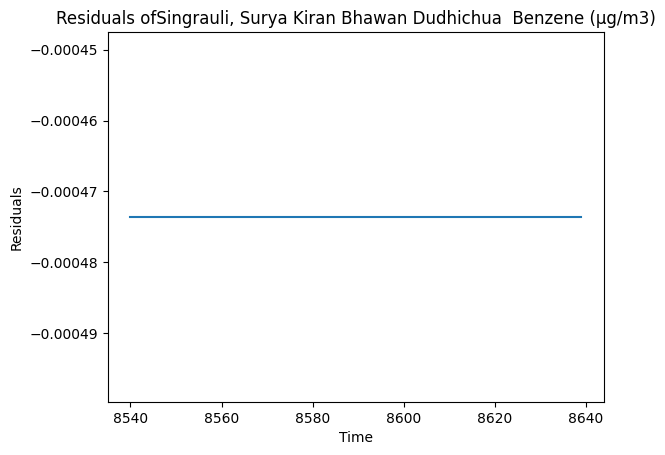

c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


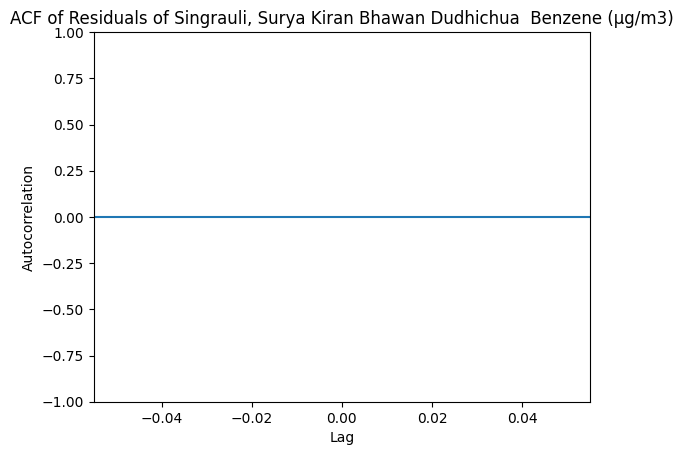

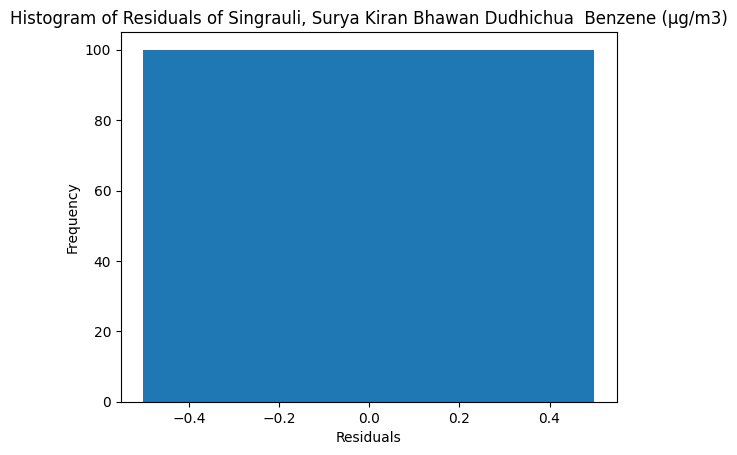

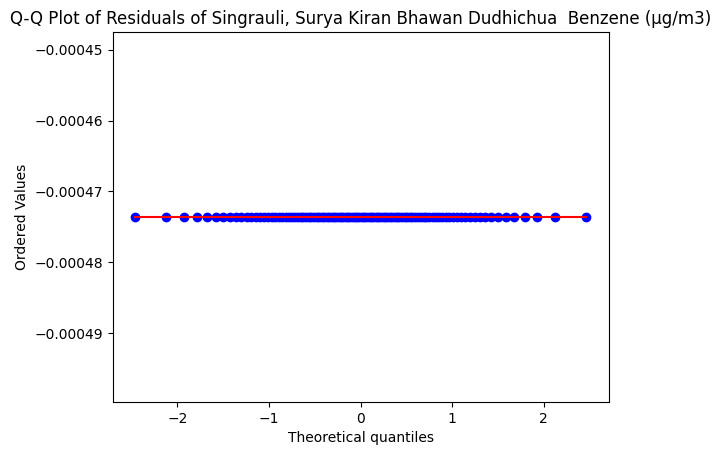

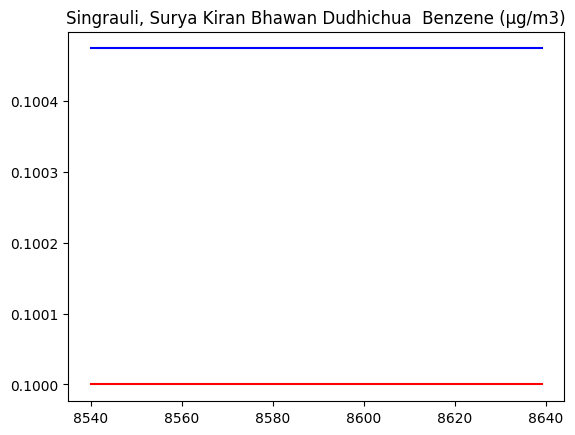

Mean : 0.122002
Root Mean Squared Error : 0.000474


In [21]:
from scipy.stats import probplot
for column in columns:
    data = dataSet[column]
    train_data = data[:-100]
    test_data = data[-100:]
    ar_model = AutoReg(data, lags = 2).fit()
    print(ar_model.summary())
    pred = ar_model.predict(start = len(train_data), end = len(data) - 1, dynamic=False)
    residuals = test_data - pred
    residual_mean = residuals.mean()
    print('Residual Mean = %f' %residual_mean)
    plt.plot(residuals)
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.title('Residuals of' + column)
    plt.show()
    plot_acf(residuals, lags=20)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('ACF of Residuals of ' + column)
    plt.show()
    # Histogram
    plt.hist(residuals, bins='auto')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals of ' + column)
    plt.show()

    # Q-Q plot
    probplot(residuals, plot=plt)
    plt.title('Q-Q Plot of Residuals of ' + column)
    plt.show()
    plt.plot(pred, color = "blue")
    plt.plot(test_data, color = "red")
    plt.title(column)
    plt.show()
    rmse = sqrt(mean_squared_error(pred, test_data))
    mean = data.mean()
    print("Mean : %f" % mean)
    print("Root Mean Squared Error : %f" %rmse)


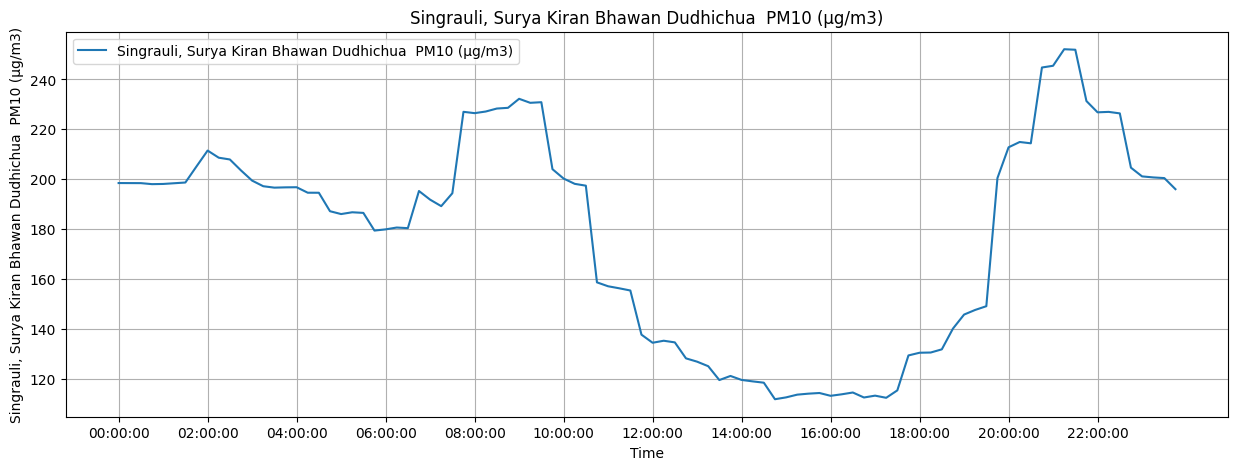

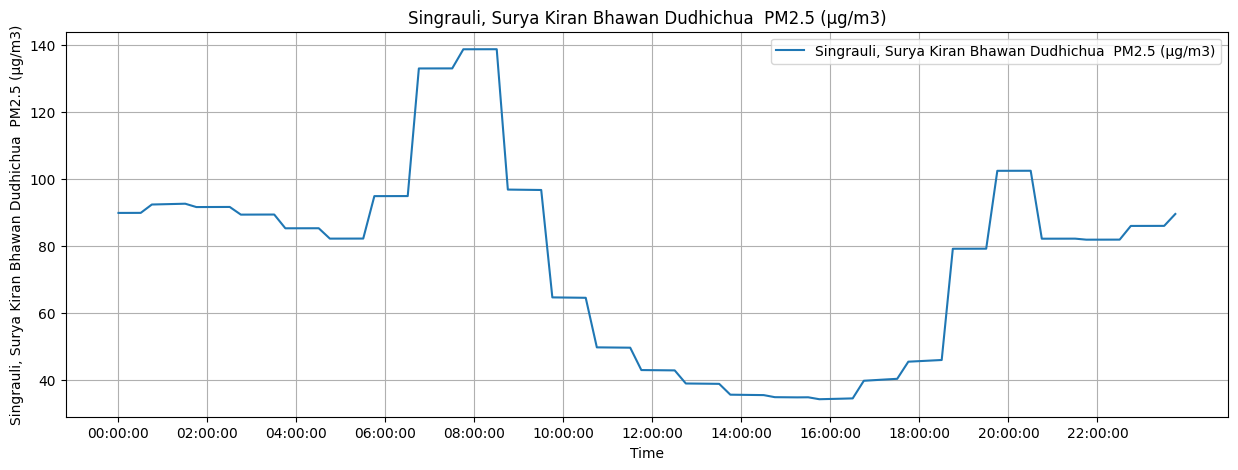

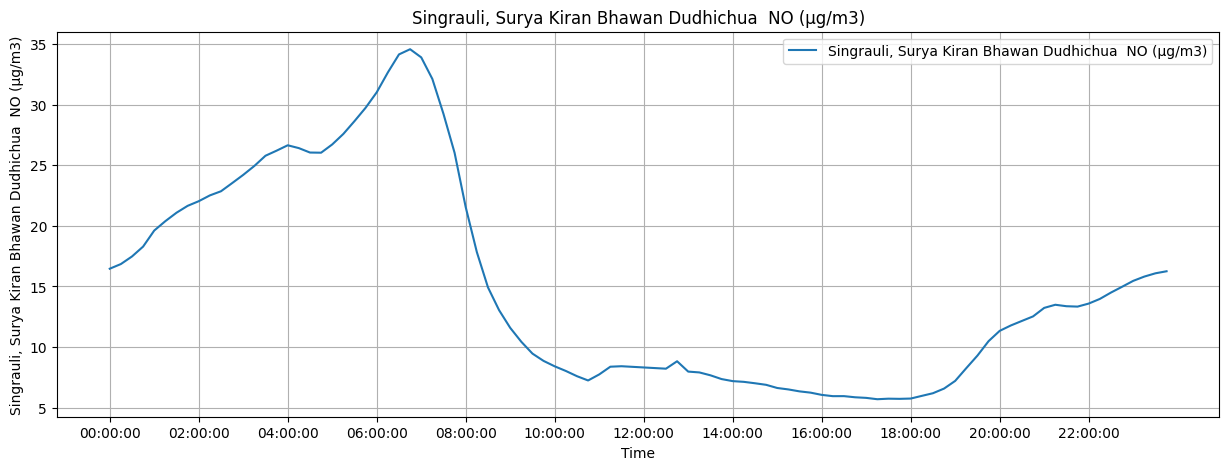

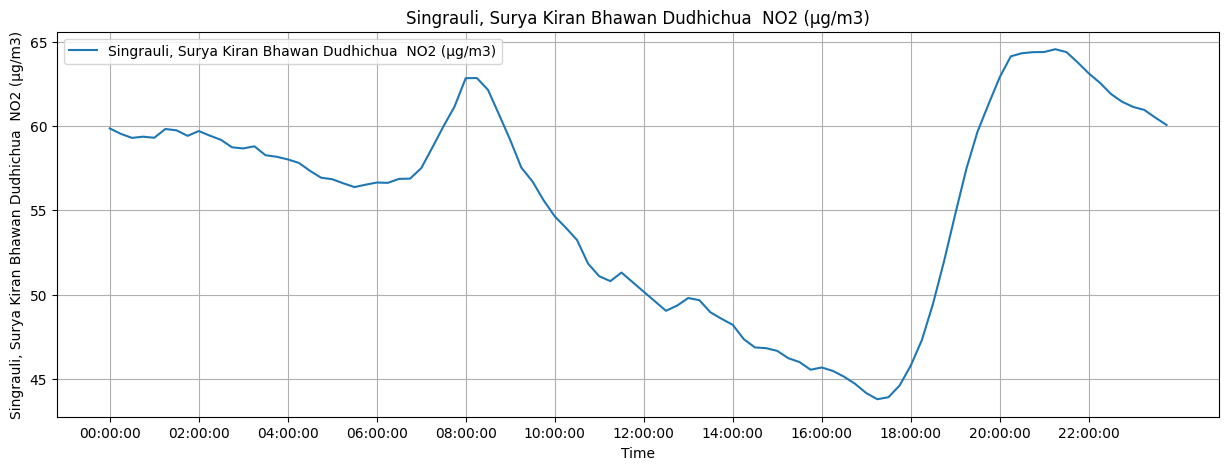

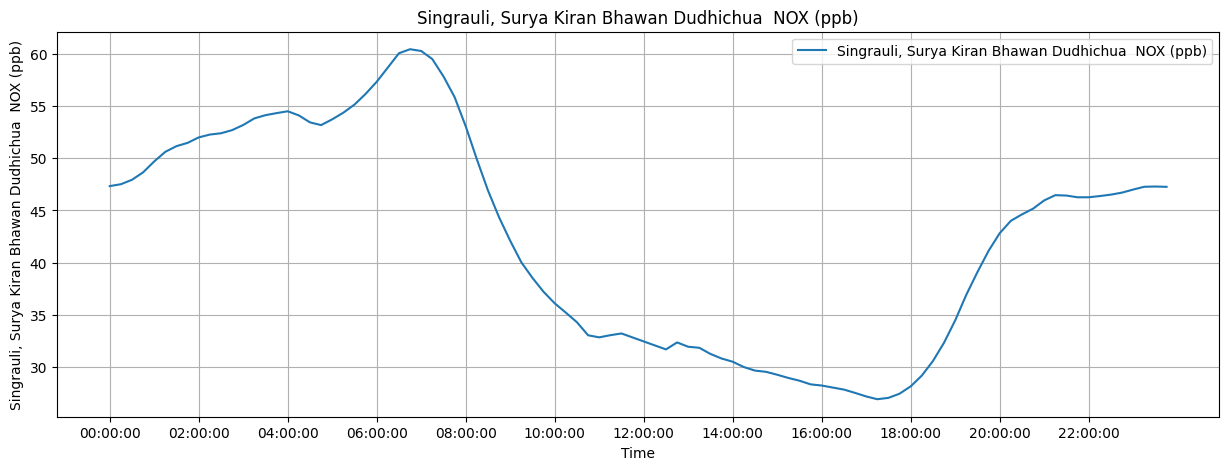

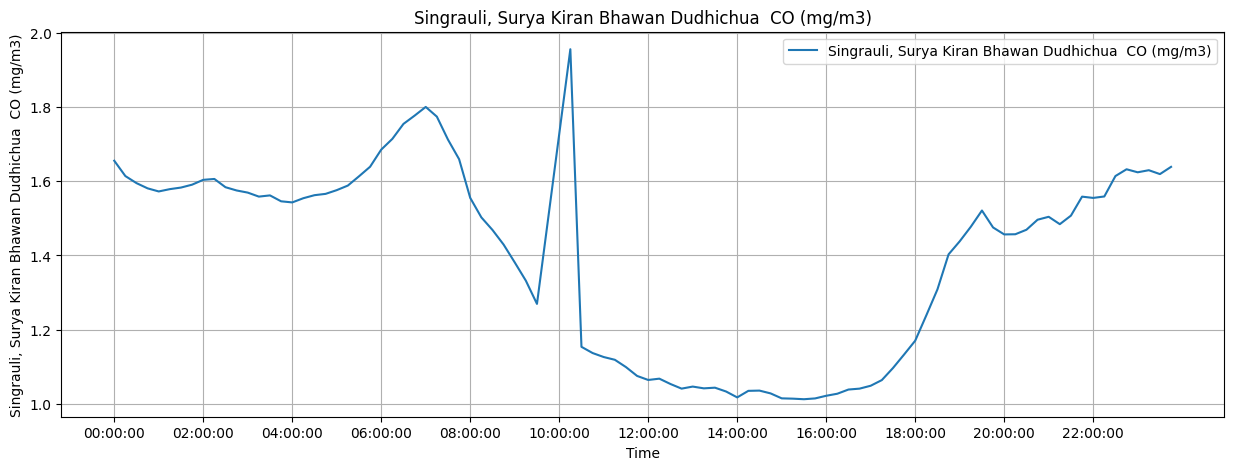

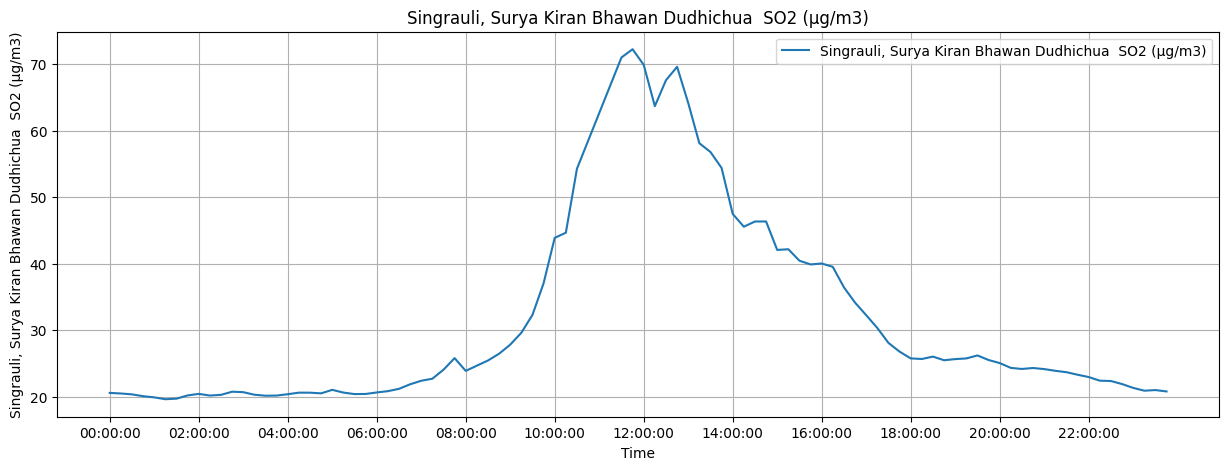

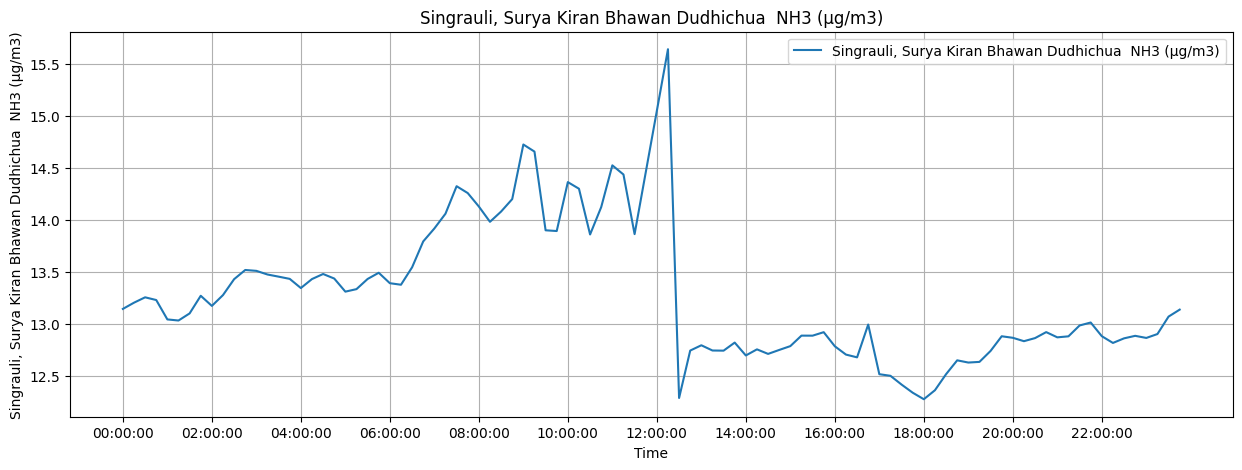

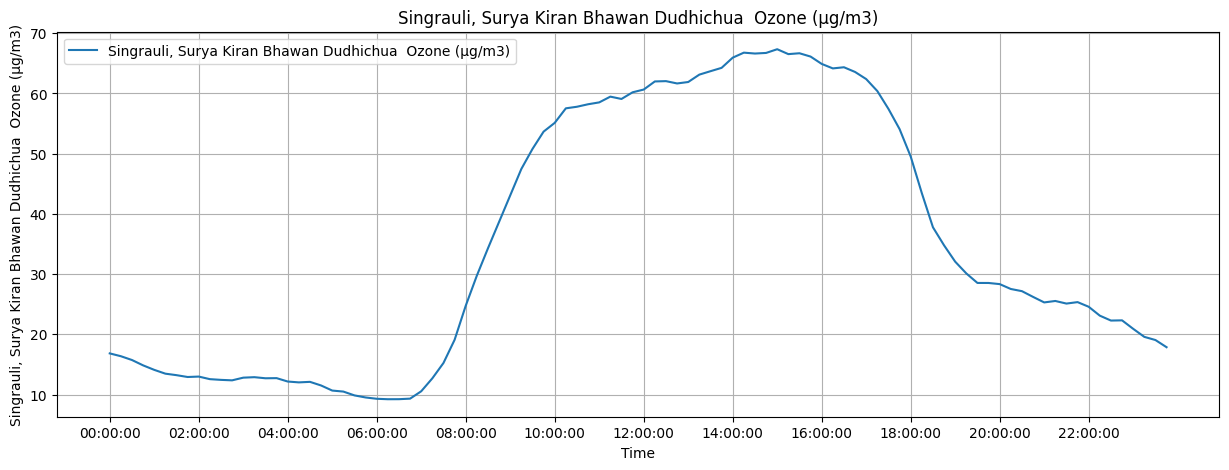

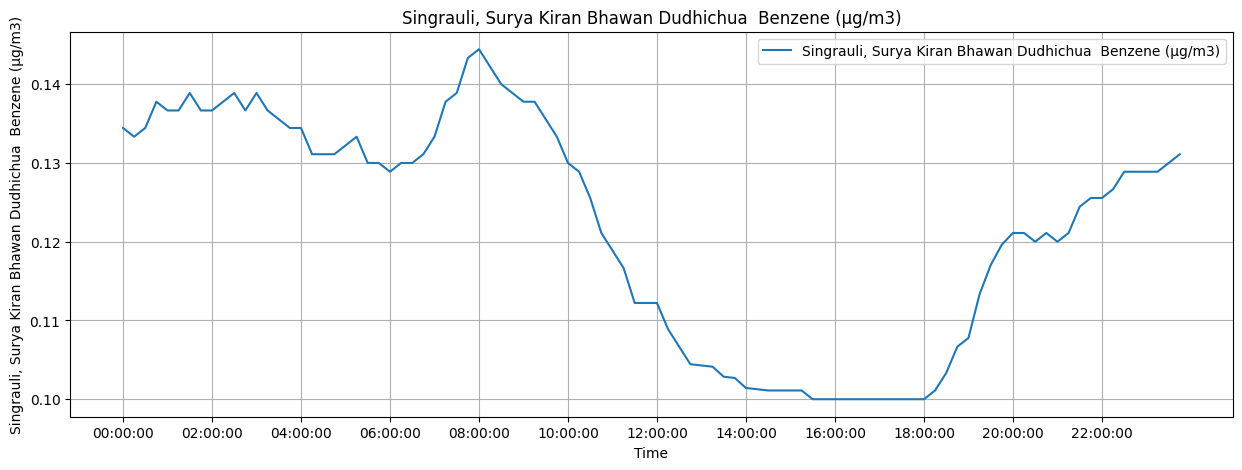

In [22]:
new_df = dataSet.copy()
new_df['From'] = pd.to_datetime(new_df['From'][:8640], format="mixed")
new_df['Time'] = new_df['From'].dt.strftime('%H:%M:%S')

new_df_means = new_df.groupby('Time').mean(numeric_only = "numeric_only").reset_index()
new_df_means

for column in columns:
    plt.figure(figsize=(15, 5))
    plt.plot(new_df_means['Time'] ,new_df_means[column] , label = column)
    tick_frequency = 8
    x_ticks = range(0, len(new_df_means['Time']), tick_frequency)
    x_labels = new_df_means['Time'].iloc[x_ticks]
    plt.xticks(x_ticks, x_labels)
    
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

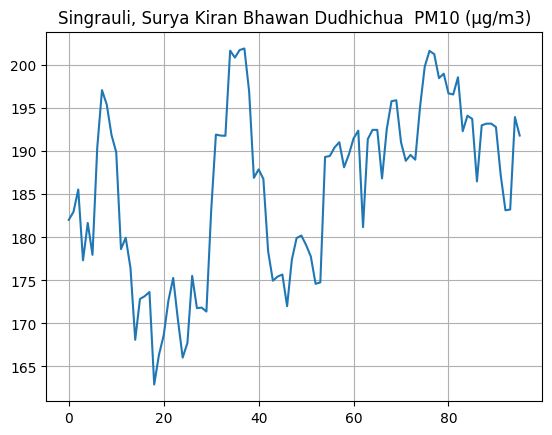

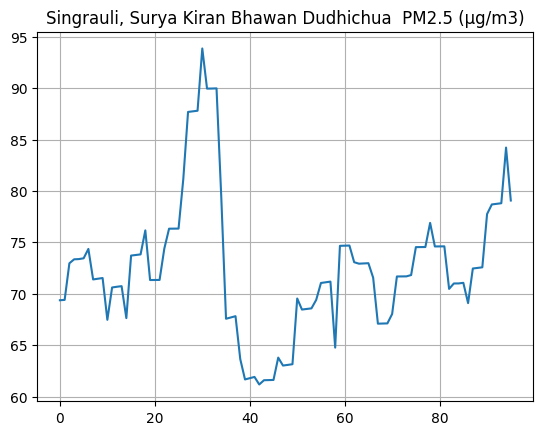

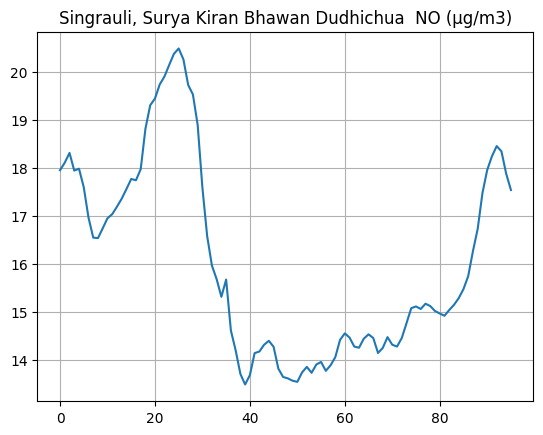

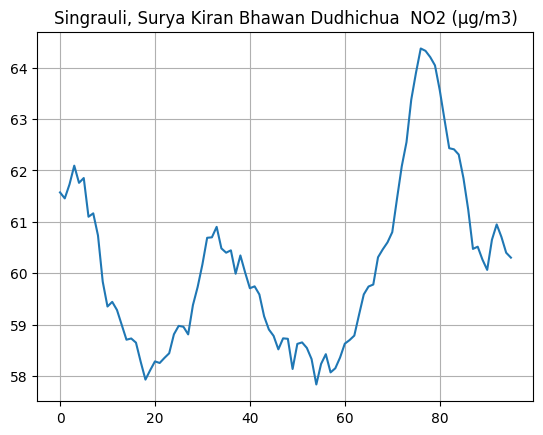

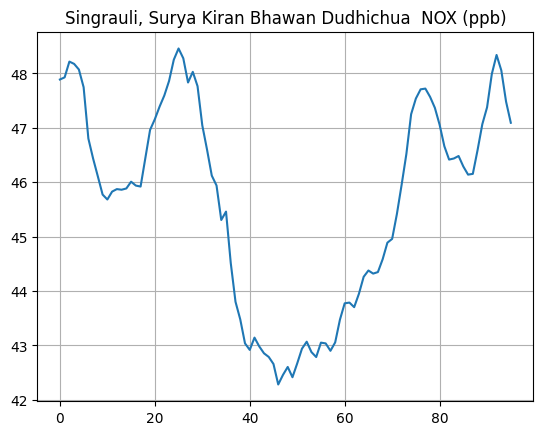

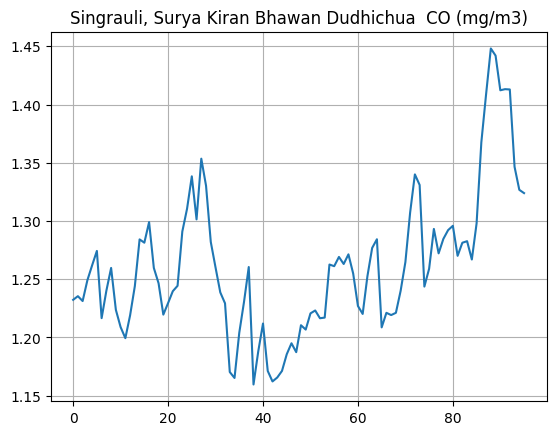

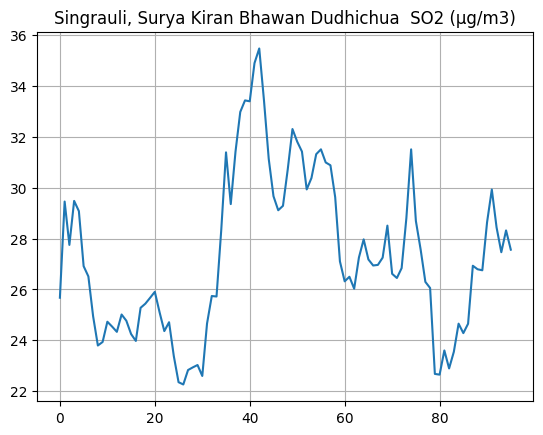

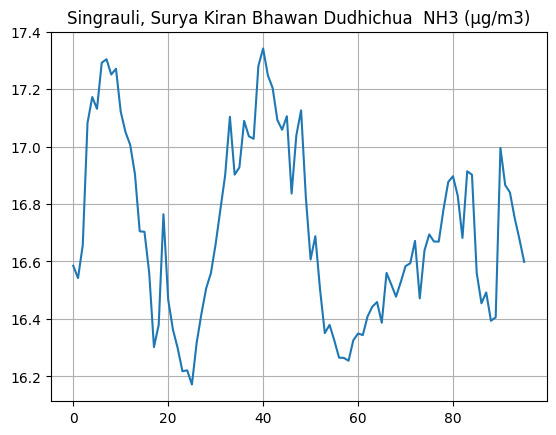

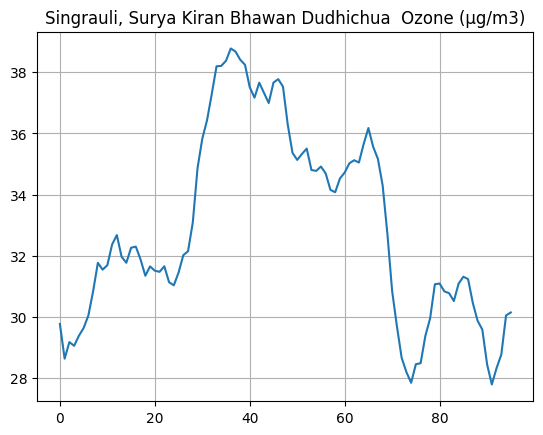

In [23]:
time = []
for column in columns:
    h = []
    for x in range(96):
        sum = 0
        a = 0
        for y in range(90):
            sum = sum + dataSet[column][x + a * y]
            a = a + 1
        
        sum = sum / 90
        h.append(sum)
    
    time.append(h)
    
for i in range(9):
    plt.plot(time[i])
    plt.title(columns[i])
    plt.grid()
    plt.show()

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8640
Model:                                                        AutoReg(2)   Log Likelihood              -44166.077
Method:                                                  Conditional MLE   S.D. of innovations             40.208
Date:                                                   Tue, 27 Jun 2023   AIC                          88340.154
Time:                                                           22:39:26   BIC                          88368.410
Sample:                                                                2   HQIC                         88349.788
                                                                    8640                                         
                                                               coef    std err          

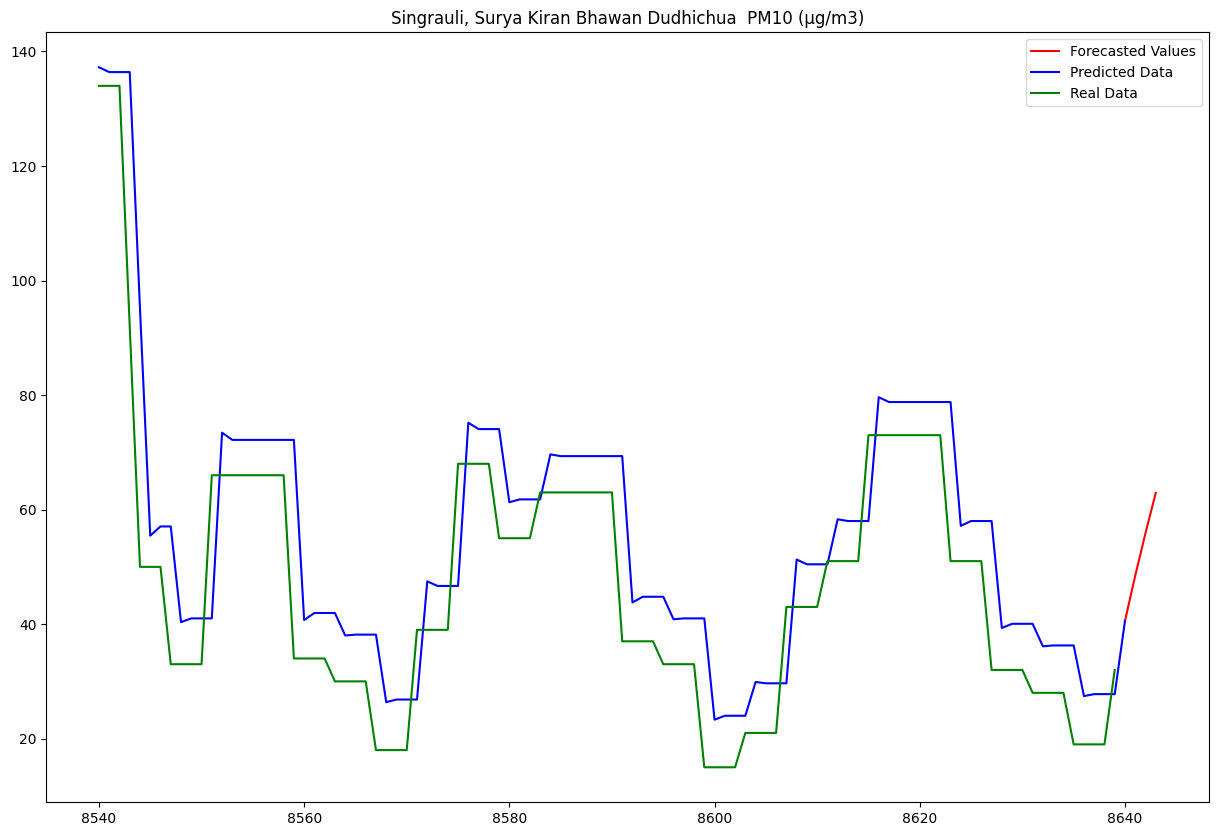

Mean Absolute Error: 9.997905641686044
Root Mean Squared Error: 12.807041015837934
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -38120.032
Method:                                                   Conditional MLE   S.D. of innovations             19.968
Date:                                                    Tue, 27 Jun 2023   AIC                          76248.064
Time:                                                            22:39:26   BIC                          76276.320
Sample:                                                                 2   HQIC                         76257.698
                                                                     8640                                       

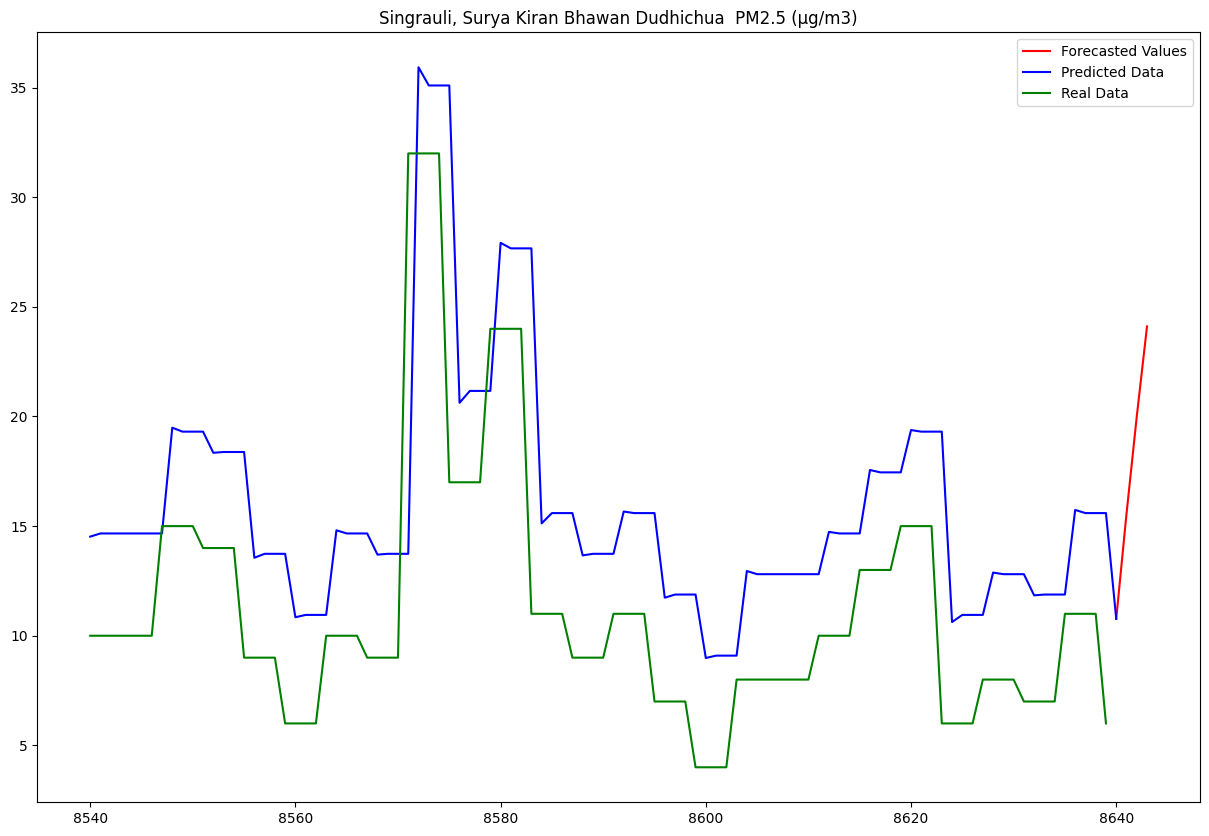

Mean Absolute Error: 5.035982071535875
Root Mean Squared Error: 5.739367454946423
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood              -21144.423
Method:                                                Conditional MLE   S.D. of innovations              2.798
Date:                                                 Tue, 27 Jun 2023   AIC                          42296.847
Time:                                                         22:39:26   BIC                          42325.103
Sample:                                                              2   HQIC                         42306.481
                                                                  8640                                         
                      

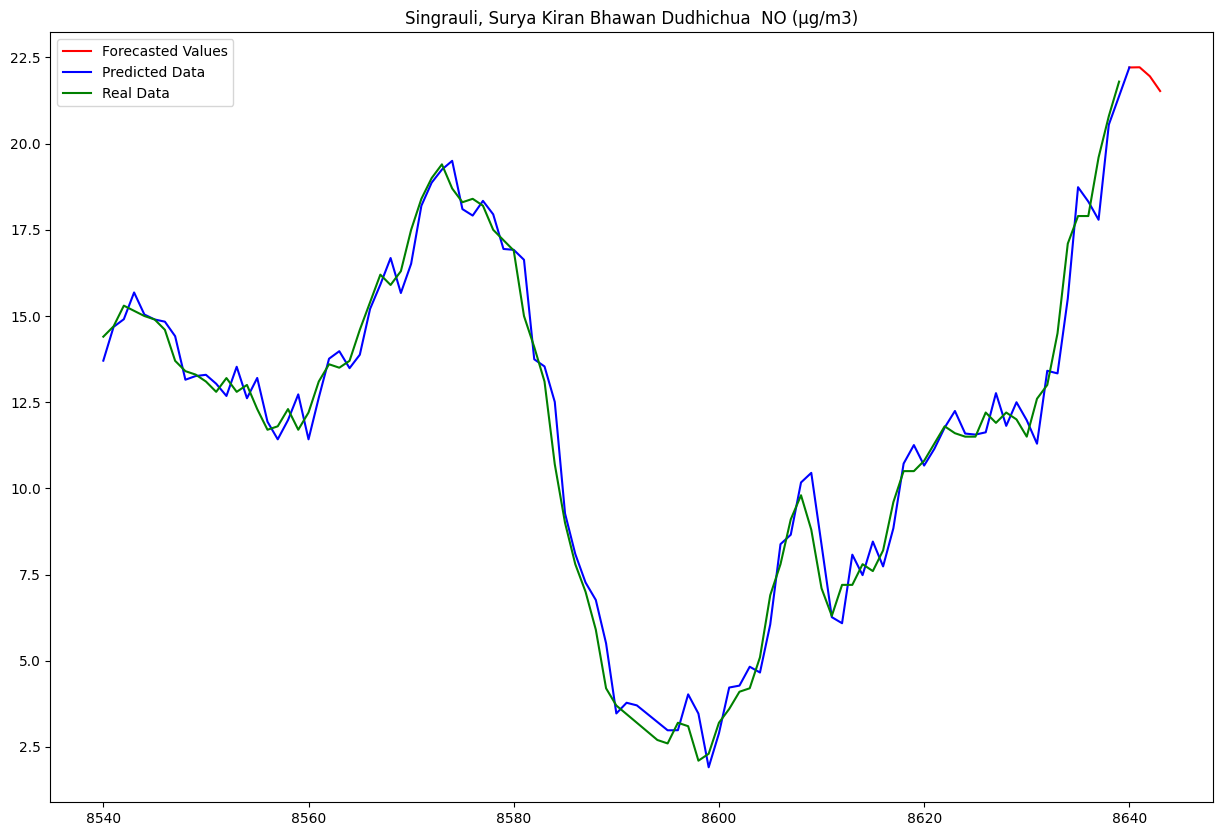

Mean Absolute Error: 0.5385183487941299
Root Mean Squared Error: 0.6791086790313362
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -21776.975
Method:                                                 Conditional MLE   S.D. of innovations              3.011
Date:                                                  Tue, 27 Jun 2023   AIC                          43561.949
Time:                                                          22:39:27   BIC                          43590.205
Sample:                                                               2   HQIC                         43571.584
                                                                   8640                                         
            

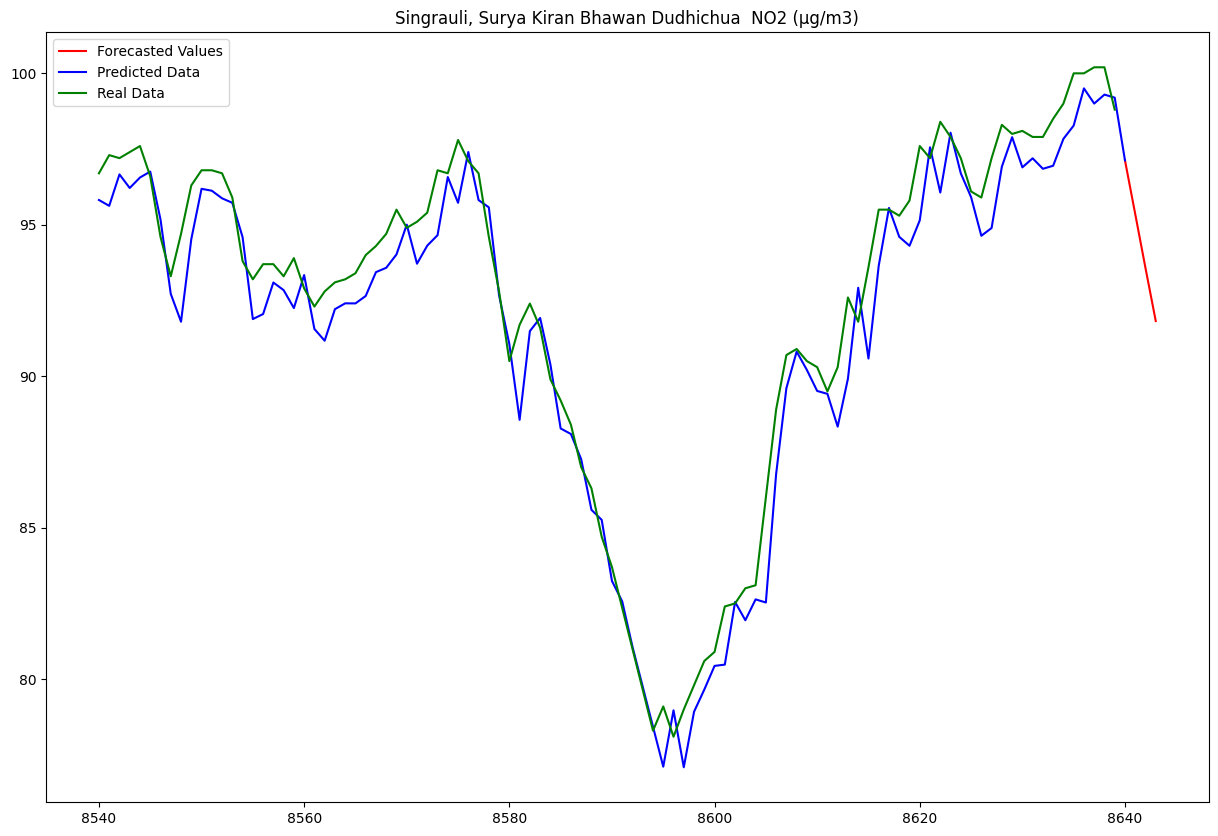

Mean Absolute Error: 1.0149966459763264
Root Mean Squared Error: 1.2730811601110845
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8640
Model:                                                     AutoReg(2)   Log Likelihood              -21178.954
Method:                                               Conditional MLE   S.D. of innovations              2.809
Date:                                                Tue, 27 Jun 2023   AIC                          42365.907
Time:                                                        22:39:27   BIC                          42394.163
Sample:                                                             2   HQIC                         42375.542
                                                                 8640                                         
                            

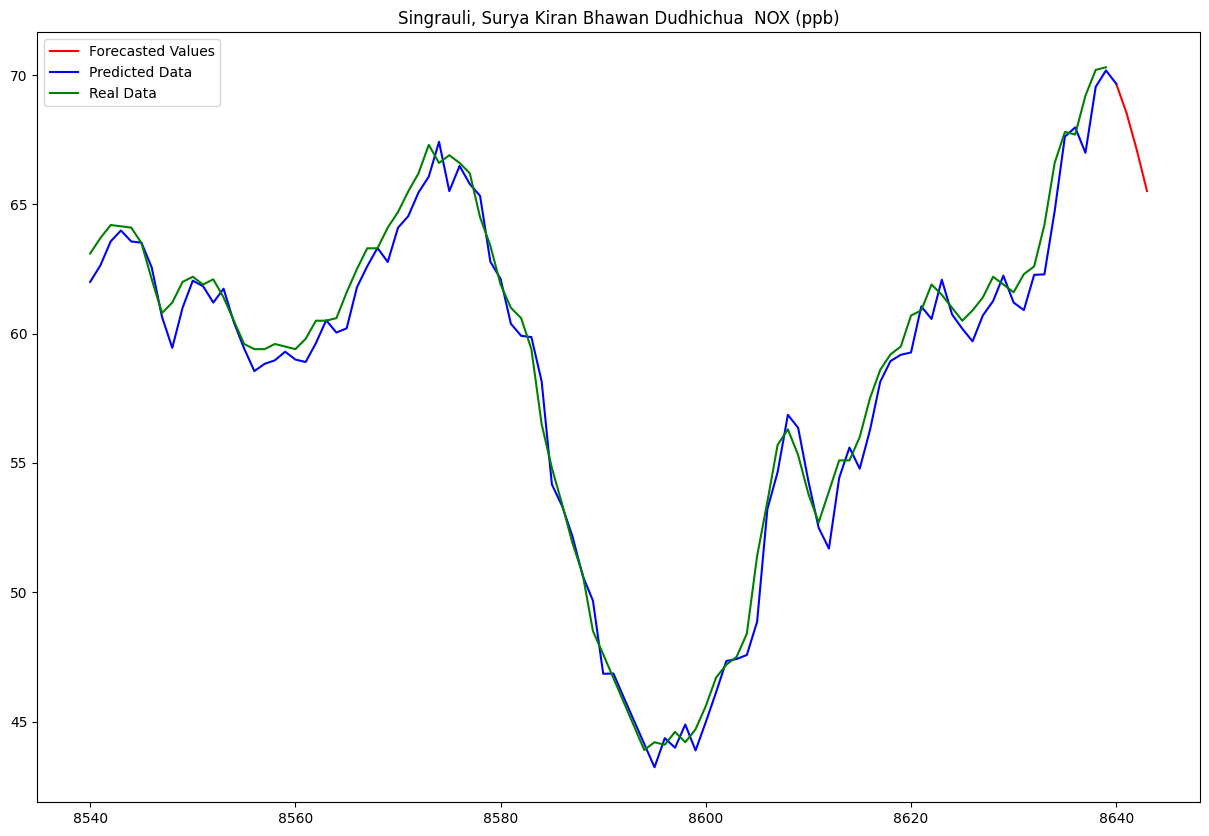

Mean Absolute Error: 0.6802130761324355
Root Mean Squared Error: 0.8627181893328704
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood                3197.737
Method:                                                Conditional MLE   S.D. of innovations              0.167
Date:                                                 Tue, 27 Jun 2023   AIC                          -6387.475
Time:                                                         22:39:28   BIC                          -6359.219
Sample:                                                              2   HQIC                         -6377.840
                                                                  8640                                         
                    

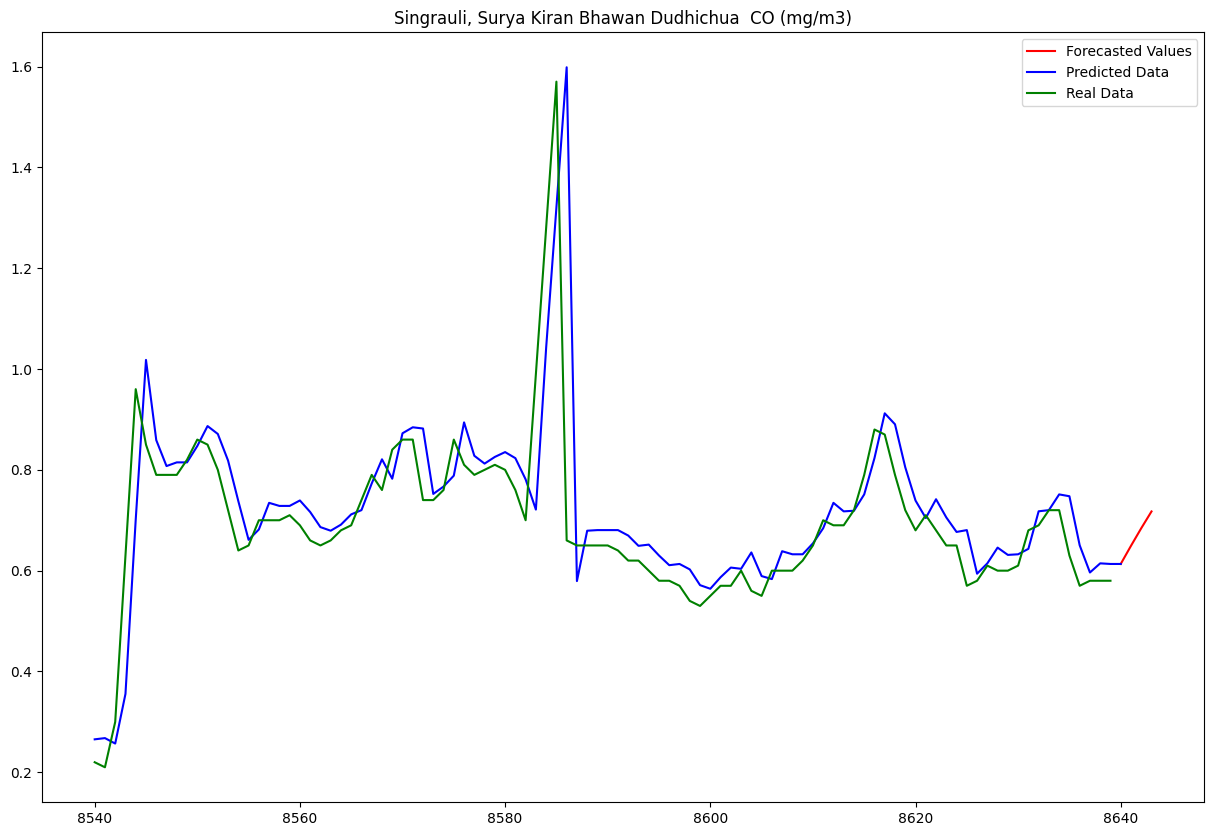

Mean Absolute Error: 0.061133384757247285
Root Mean Squared Error: 0.12103652942480869
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -35690.757
Method:                                                 Conditional MLE   S.D. of innovations             15.073
Date:                                                  Tue, 27 Jun 2023   AIC                          71389.514
Time:                                                          22:39:28   BIC                          71417.770
Sample:                                                               2   HQIC                         71399.148
                                                                   8640                                         
         

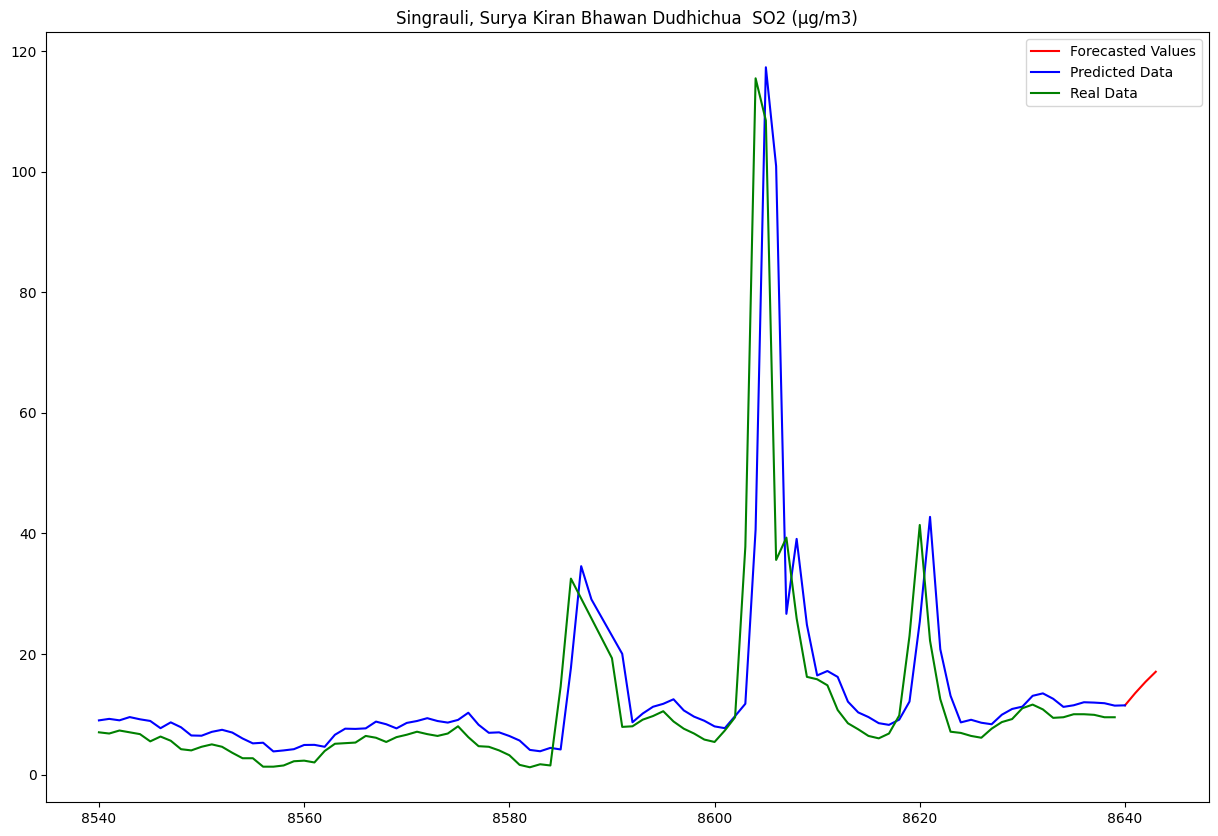

Mean Absolute Error: 5.092845024474927
Root Mean Squared Error: 11.39346676859677
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -12626.145
Method:                                                 Conditional MLE   S.D. of innovations              1.044
Date:                                                  Tue, 27 Jun 2023   AIC                          25260.290
Time:                                                          22:39:29   BIC                          25288.546
Sample:                                                               2   HQIC                         25269.925
                                                                   8640                                         
              

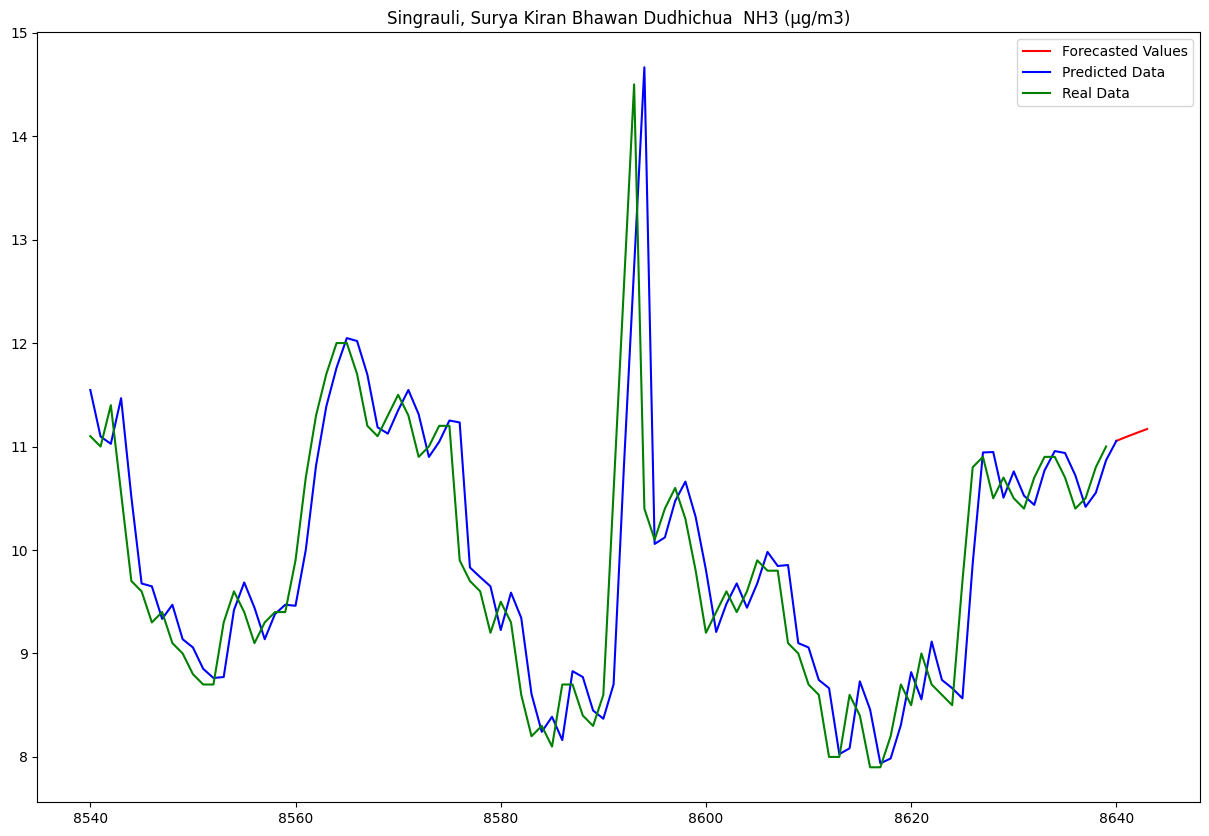

Mean Absolute Error: 0.386017132219814
Root Mean Squared Error: 0.6506204060723239
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -26584.645
Method:                                                   Conditional MLE   S.D. of innovations              5.252
Date:                                                    Tue, 27 Jun 2023   AIC                          53177.289
Time:                                                            22:39:29   BIC                          53205.545
Sample:                                                                 2   HQIC                         53186.923
                                                                     8640                                       

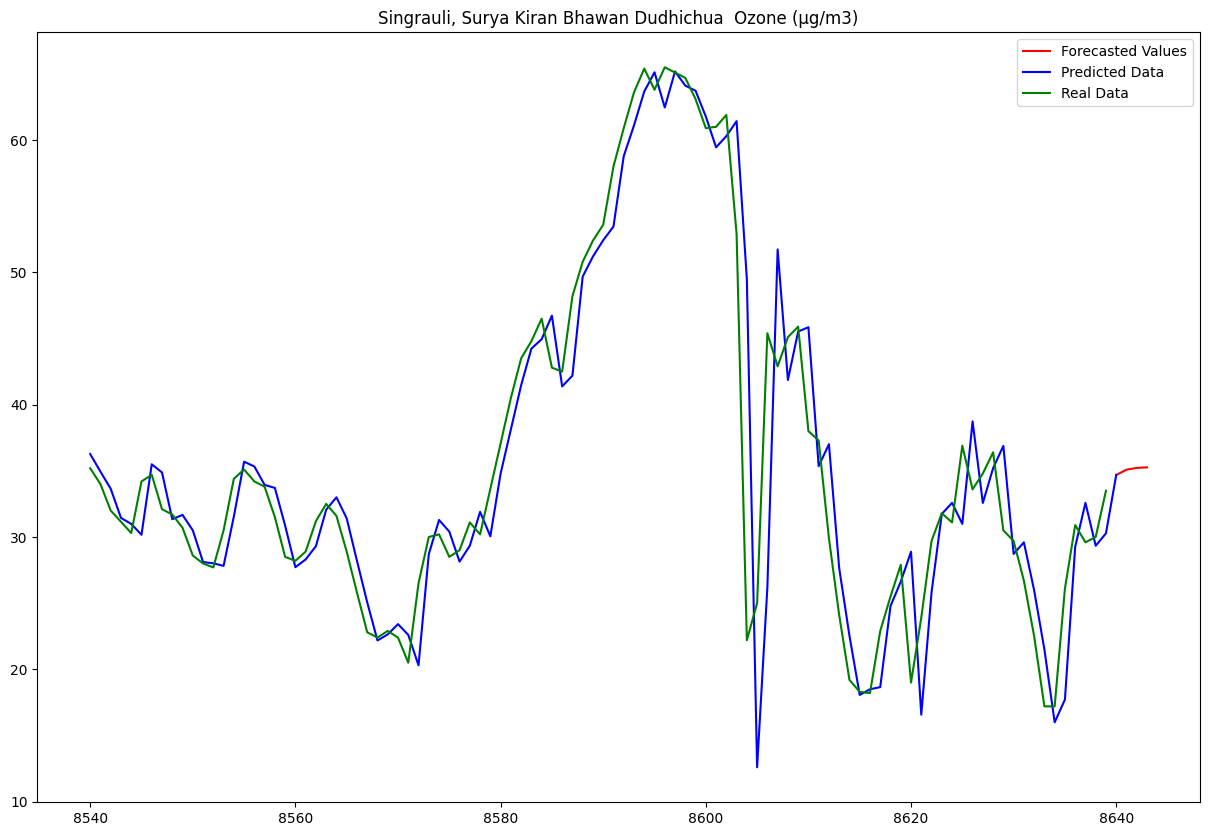

Mean Absolute Error: 2.894095692989021
Root Mean Squared Error: 4.775819407486163
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8640
Model:                                                           AutoReg(2)   Log Likelihood               25041.140
Method:                                                     Conditional MLE   S.D. of innovations              0.013
Date:                                                      Tue, 27 Jun 2023   AIC                         -50074.281
Time:                                                              22:39:30   BIC                         -50046.025
Sample:                                                                   2   HQIC                        -50064.646
                                                                       8640                        

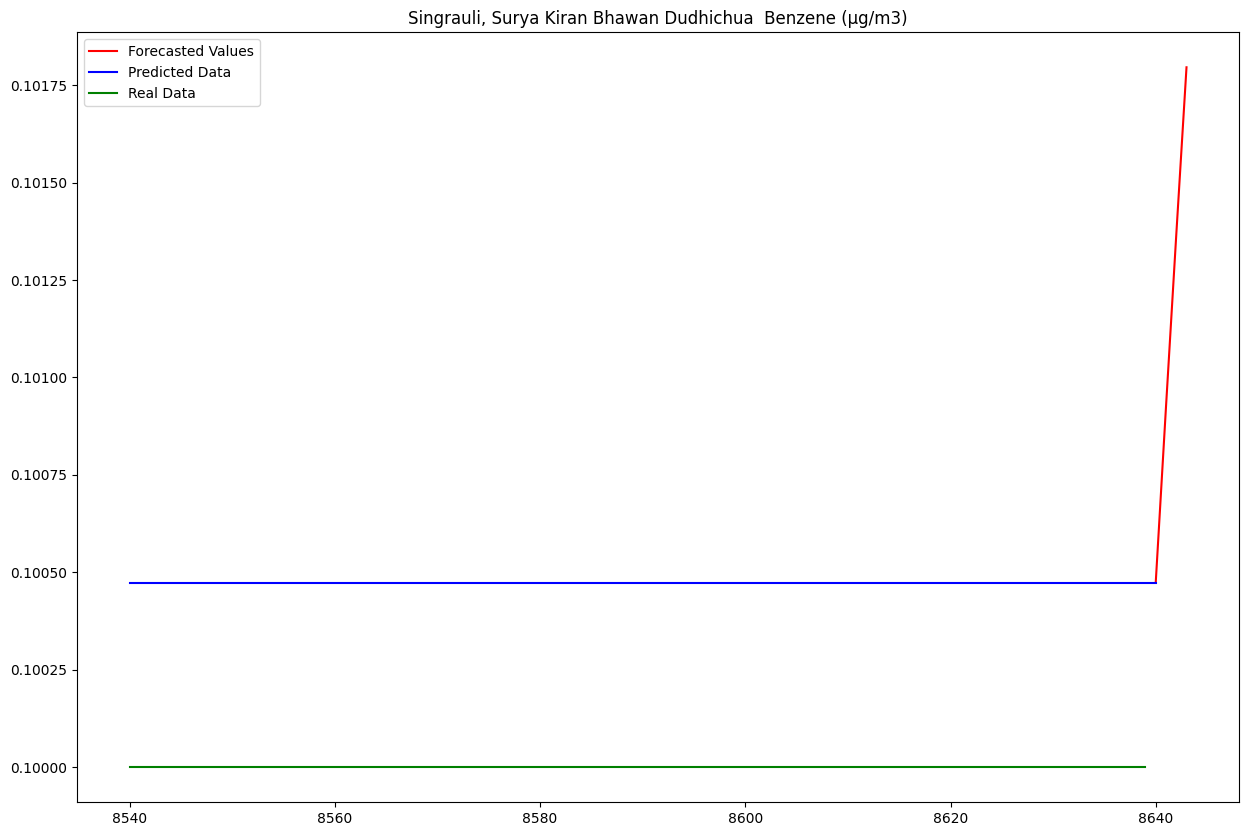

Mean Absolute Error: 0.0004735862136944907
Root Mean Squared Error: 0.0004735862136944908


In [24]:
from sklearn.metrics import mean_absolute_error
for column in columns:
    data = dataSet[column][:8640]
    train_data = data[:-100]
    test_data = data[-100:]
    ar_model = AutoReg(data, lags = 2).fit()
    pred = ar_model.predict(start = len(train_data), end = len(data), dynamic=False)
    forecast = ar_model.predict(start = len(data), end = len(data)+3, dynamic=False)
    plt.figure(figsize = (15,10))
    plt.title(column)
    plt.plot(forecast , color ="red", label="Forecasted Values")
    plt.plot(pred, color = "blue", label="Predicted Data")
    plt.plot(test_data, color = "green", label="Real Data")
    plt.legend()
    plt.show()
    pred = ar_model.predict(start = len(train_data), end = len(data)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(pred, test_data))
    mean = data.mean()
    print("Mean Absolute Error:", mean_absolute_error(pred,test_data))
    print("Root Mean Squared Error:",rmse)